# Імпорт необхідних бібліотек

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

# Імпорт даних

Вмонтуємо наш диск, якщо Ви працюєте в Google Colab. Якщо працюєте локально, пропустіть наступну клітинку.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Знайдемо, де лежать наші файли з даними. В мене вони знаходяться тут:

In [11]:
path = "/content/drive/MyDrive/Colab Notebooks/Machine Learning для людей - Лекційний ноутбук Дослідницького аналізу даних"

Зчитуємо дані.

In [12]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning для людей - Лекціний ноутбук Дослідницького аналізу даних/application_data.csv")

In [13]:
# Огляд декількох записів з датафрейму
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   
1               N             0         270000.00  1293502.50     35698.50   
2               Y             0          67500.00   135000.00      6750.00   
3               Y             0         135000.00   312682.50     29686.50   
4               Y             0         121500.00   513000.00     21865.50   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        351000.00   Unaccompanied          Working   
1       1129500.00          Family    State servant   
2        135000.00   Unaccompanied          Working   
3        297000.00   Unaccompanied          Working   
4        513000.00   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.02       -9461           -637           -3648.00   
1                        0.00      -16765          -1188           -1186.00   
2                        0.01      -19046           -225           -4260.00   
3                        0.01      -19005          -3039           -9833.00   
4                        0.03      -19932          -3038           -4311.00   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531        26.00           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.00   
1                 1           1           0      Core staff             2.00   
2                 1           1           0        Laborers             1.00   
3                 1           0           0        Laborers             2.00   
4                 1           0           0      Core staff             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# Перевірка структури даних

In [14]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [15]:
df.shape

(307511, 122)

Маємо ~307k рядків та 122 колонки.

## Статистичний звіт для числових змінних

In [16]:
df.describe()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count   307511.00 307511.00     307511.00         307511.00   307511.00   
mean    278180.52      0.08          0.42         168797.92   599026.00   
std     102790.18      0.27          0.72         237123.15   402490.78   
min     100002.00      0.00          0.00          25650.00    45000.00   
25%     189145.50      0.00          0.00         112500.00   270000.00   
50%     278202.00      0.00          0.00         147150.00   513531.00   
75%     367142.50      0.00          1.00         202500.00   808650.00   
max     456255.00      1.00         19.00      117000000.00  4050000.00   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count    307499.00        307233.00                   307511.00   307511.00   
mean      27108.57        538396.21                        0.02   -16037.00   
std       14493.74        369446.46                        0.01     4363.99   
min        1615.50         40500.00                        0.00   -25229.00   
25%       16524.00        238500.00                        0.01   -19682.00   
50%       24903.00        450000.00                        0.02   -15750.00   
75%       34596.00        679500.00                        0.03   -12413.00   
max      258025.50       4050000.00                        0.07    -7489.00   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count      307511.00          307511.00        307511.00    104582.00   
mean        63815.05           -4986.12         -2994.20        12.06   
std        141275.77            3522.89          1509.45        11.94   
min        -17912.00          -24672.00         -7197.00         0.00   
25%         -2760.00           -7479.50         -4299.00         5.00   
50%         -1213.00           -4504.00         -3254.00         9.00   
75%          -289.00           -2010.00         -1720.00        15.00   
max        365243.00               0.00             0.00        91.00   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count   307511.00       307511.00        307511.00         307511.00   
mean         1.00            0.82             0.20              1.00   
std          0.00            0.38             0.40              0.04   
min          0.00            0.00             0.00              0.00   
25%          1.00            1.00             0.00              1.00   
50%          1.00            1.00             0.00              1.00   
75%          1.00            1.00             0.00              1.00   
max          1.00            1.00             1.00              1.00   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count   307511.00   307511.00        307509.00             307511.00   
mean         0.28        0.06             2.15                  2.05   
std          0.45        0.23             0.91                  0.51   
min          0.00        0.00             1.00                  1.00   
25%          0.00        0.00             2.00                  2.00   
50%          0.00        0.00             2.00                  2.00   
75%          1.00        0.00             3.00                  2.00   
max          1.00        1.00            20.00                  3.00   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                    307511.00                307511.00   
mean                          2.03                    12.06   
std                           0.50                     3.27   
min                           1.00                     0.00   
25%                           2.00                    10.00   
50%                           2.00                    12.00   
75%                           2.00                    14.00   
max                           3.00                    23.00   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                   307511

# Аналіз категоріальних змінних

In [17]:
df.select_dtypes(include = "object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [18]:
# Перевірка кількості категоріальних змінних
len(df.select_dtypes(include = "object").columns)

16

Дані містять 16 `categorical` змінних

# Аналіз числових змінних

In [19]:
number_df = df.select_dtypes(include="number")

In [20]:
number_df.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [21]:
# Перевірка кількості числових змінних
len(number_df.columns)

106

Дані міcтять 106 `numerical` змінних

In [22]:
number_df.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0         202500.00   406597.50   
1      100003       0             0         270000.00  1293502.50   
2      100004       0             0          67500.00   135000.00   
3      100006       0             0         135000.00   312682.50   
4      100007       0             0         121500.00   513000.00   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0     24700.50        351000.00                        0.02       -9461   
1     35698.50       1129500.00                        0.00      -16765   
2      6750.00        135000.00                        0.01      -19046   
3     29686.50        297000.00                        0.01      -19005   
4     21865.50        513000.00                        0.03      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           -637           -3648.00            -2120          NaN           1   
1          -1188           -1186.00             -291          NaN           1   
2           -225           -4260.00            -2531        26.00           1   
3          -3039           -9833.00            -2437          NaN           1   
4          -3038           -4311.00            -3458          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0             1.00                     2                            2   
1             2.00                     1                            1   
2             1.00                     2                            2   
3             2.00                     2                            2   
4             1.00                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0          0.08          0.26          0.14            0.02              0.04   
1          0.31          0.62           NaN            0.10              0.05   
2           NaN          0.56          0.73             NaN               NaN   
3           NaN          0.65           NaN             NaN               NaN   
4           NaN          0.32           NaN             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COM

# Робота з некоректними типами даних

Перевірка, чи немає у нас стовпця з неправильним типом даних

In [23]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64
FLAG_PHONE                        int64
FLAG_EMAIL                        int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_LIVE_REGION        int64
REG_REGION_NOT_WORK_REGION        int64
LIVE_REGION_NOT_WORK_REGION       int64
REG_CITY_NOT_LIVE_CITY            int64
REG_CITY_NOT_WORK_CITY            int64
LIVE_CITY_NOT_WORK_CITY           int64
ORGANIZATION_TYPE                object
EXT_SOURCE_1                    float64
EXT_SOURCE_2                    float64
EXT_SOURCE_3                    float64
APARTMENTS_AVG                  float64
BASEMENTAREA_AVG                float64
YEARS_BEGINEXPLUATATION_AVG     float64
YEARS_BUILD_AVG                 float64
COMMONAREA_AVG                  float64
ELEVATORS_AVG                   float64
ENTRANCES_AVG                   float64
FLOORSMAX_AVG                   float64
FLOORSMIN_AVG                   float64
LANDAREA_AVG                    float64
LIVINGAPARTMENTS_AVG            float64
LIVINGAREA_AVG                  float64
NONLIVINGAPARTMENTS_AVG         float64
NONLIVINGAREA_AVG               float64
APARTMENTS_MODE                 float64
BASEMENTAREA_MODE               float64
YEARS_BEGINEXPLUATATION_MODE    float64
YEARS_BUILD_MODE                float64
COMMONAREA_MODE                 float64
ELEVATORS_MODE                  float64
ENTRANCES_MODE                  float64
FLOORSMAX_MODE                  float64
FLOORSMIN_MODE                  float64
LANDAREA_MODE                   float64
LIVINGAPARTMENTS_MODE           float64
LIVINGAREA_MODE                 float64
NONLIVINGAPARTMENTS_MODE        float64
NONLIVINGAREA_MODE              float64
APARTMENTS_MEDI                 float64
BASEMENTAREA_MEDI               float64
YEARS_BEGINEXPLUATATION_MEDI    float64
YEARS_BUILD_MEDI                float64
COMMONAREA_MEDI                 float64
ELEVATORS_MEDI                  float64
ENTRANCES_MEDI                  float64
FLOORSMAX_MEDI                  float64
FLOORSMIN_MEDI                  float64
LANDAREA_MEDI                   float64
LIVINGAPARTMENTS_MEDI           float64
LIVINGAREA_MEDI                 float64
NONLIVINGAPARTMENTS_MEDI        float64
NONLIVINGAREA_MEDI              float64
FONDKAPREMONT_MODE               object
HOUSETYPE_MODE                   object
TOTALAREA_MODE                  float64
WALLSMATERIAL_MODE               object
EMERGENCYSTATE_MODE              object
OBS_30_CNT_SOCIAL_CIRCLE        float64
DEF_30_CNT_SOCIAL_CIRCLE        float64
OBS_60_CNT_SOCIAL_CIRCLE        float64
DEF_60_CNT_SOCIAL_CIRCLE        float64
DAYS_LAST_PHONE_CHANGE          float64
FLAG_DOCUMENT_2                   int64
FLAG_DOCUMENT_3                   int64
FLAG_DOCUMENT_4                   int64
FLAG_DOCUMENT_5                   int64


Дивлячись на дані та відповідні їм типи даних, можна змінити

1.   Елемент списку
2.   Елемент списку

тип стовпчика SKU.

In [24]:
df['SK_ID_CURR'] = df['SK_ID_CURR'].astype("str")

Також ми можемо змінити всі стовпці `flag` на тип даних, який є більш економний для зберігання.

Ось скільки пам'яті в Мб займають наші дані зараз.

In [25]:
df.memory_usage().sum()/1024/1024

np.float64(286.22710037231445)

Отже, ми можемо потенційно заощадити 57 Мб пам'яті! І трансформувати наш фрейм даних буде простіше. Давайте змінимо тип.


In [26]:
flag_cols = ['flag' in col.lower() for col in df.columns]

In [27]:
df[df.columns[flag_cols]].head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                 1           1           0                0                1   
1                 1           1           0                0                1   
2                 1           1           0                0                0   
3                 1           0           0                0                1   
4                 1           0           0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                1                0                 0                 0   

   FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

In [28]:
df[df.columns[flag_cols]].nunique()

FLAG_OWN_CAR        2
FLAG_OWN_REALTY     2
FLAG_MOBIL          2
FLAG_EMP_PHONE      2
FLAG_WORK_PHONE     2
FLAG_CONT_MOBILE    2
FLAG_PHONE          2
FLAG_EMAIL          2
FLAG_DOCUMENT_2     2
FLAG_DOCUMENT_3     2
FLAG_DOCUMENT_4     2
FLAG_DOCUMENT_5     2
FLAG_DOCUMENT_6     2
FLAG_DOCUMENT_7     2
FLAG_DOCUMENT_8     2
FLAG_DOCUMENT_9     2
FLAG_DOCUMENT_10    2
FLAG_DOCUMENT_11    2
FLAG_DOCUMENT_12    2
FLAG_DOCUMENT_13    2
FLAG_DOCUMENT_14    2
FLAG_DOCUMENT_15    2
FLAG_DOCUMENT_16    2
FLAG_DOCUMENT_17    2
FLAG_DOCUMENT_18    2
FLAG_DOCUMENT_19    2
FLAG_DOCUMENT_20    2
FLAG_DOCUMENT_21    2
dtype: int64

Типи даних в pandas взяті з numpy, і ось тут список всіх типів даних в numpy:

https://numpy.org/doc/stable/user/basics.types.html

Кожен тип даних займає певну кількість байт у пам'яті. Давайте з'ясуємо, скільки займає 1 тип int8 та 1 тип int64 і скільки пам'яті ми заощадимо, якщо змінимо тип.

In [29]:
import numpy as np
from sys import getsizeof

In [30]:
getsizeof(np.int64(1))

32

In [31]:
getsizeof(np.int8(1))

25

In [32]:
7 * df.shape[0] * sum(flag_cols) / 1024 / 1024

57.48000717163086

In [33]:
str_flag_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [34]:
for col in str_flag_cols:
  df[col] = np.where(df[col]=='Y', 1, 0)

In [35]:
df[str_flag_cols].nunique()

FLAG_OWN_CAR       2
FLAG_OWN_REALTY    2
dtype: int64

In [36]:
df[df.columns[flag_cols]] = df[df.columns[flag_cols]].astype('int8')

In [37]:
df.memory_usage().sum()/1024/1024

np.float64(228.7470932006836)

# Робота з пропущеними значеннями

Найпростіше емпіричне правило для опрацювання пропущених значень: якщо пропущених значень більше за 40% - видаляємо колонку, якщо менше за 40% - аналізуємо, як можна заповнити і чи треба.

Зазвичай, якщо відсоток пропущених даних більший за 10 і немає чіткої (яка значно виділяється) моди (найчастішого) значення в даних, то лишаємо дані як є до використання методів машинного навчання. Далі якщо метод вимагає заповення пропущених значень, можемо експериментувати із заповеннями. Також хорошою практикою є створити окрему колонку-флаг (0/1), яка вказує, де були пропущені значення - це буде додаткова ознака для моделі.


Перевіримо, чи немає нульових значень в нашому наборі даних

In [38]:
df.isnull().values.any()

np.True_

Порахуємо загальну кількість нульових значень в наборі даних

In [39]:
df.isnull().values.sum()

np.int64(9152465)

Сформуємо список із стовпців з нульовими значеннями

In [40]:
df.columns[df.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [41]:
len(df.columns[df.isnull().any()])

67

Усього `67` стовпців мають одне або більше NULL-значень в даних

## Кількість та відсоток пропущених значень у стовпцях

In [42]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)

In [43]:
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)

In [44]:
null_df.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
48                 COMMONAREA_AVG      214865            69.87
62                COMMONAREA_MODE      214865            69.87
76                COMMONAREA_MEDI      214865            69.87
84       NONLIVINGAPARTMENTS_MEDI      213514            69.43
70       NONLIVINGAPARTMENTS_MODE      213514            69.43
56        NONLIVINGAPARTMENTS_AVG      213514            69.43
86             FONDKAPREMONT_MODE      210295            68.39
54           LIVINGAPARTMENTS_AVG      210199            68.35
82          LIVINGAPARTMENTS_MEDI      210199            68.35
68          LIVINGAPARTMENTS_MODE      210199            68.35
66                 FLOORSMIN_MODE      208642            67.85
52                  FLOORSMIN_AVG      208642            67.85
80                 FLOORSMIN_MEDI      208642            67.85
47                YEARS_BUILD_AVG      204488            66.50
61               YEARS_BUILD_MODE      204488            66.50
75               YEARS_BUILD_MEDI      204488            66.50
21                    OWN_CAR_AGE      202929            65.99
81                  LANDAREA_MEDI      182590            59.38
53                   LANDAREA_AVG      182590            59.38
67                  LANDAREA_MODE      182590            59.38
59              BASEMENTAREA_MODE      179943            58.52
73              BASEMENTAREA_MEDI      179943            58.52
45               BASEMENTAREA_AVG      179943            58.52
41                   EXT_SOURCE_1      173378            56.38
71             NONLIVINGAREA_MODE      169682            55.18
57              NONLIVINGAREA_AVG      169682            55.18
85             NONLIVINGAREA_MEDI      169682            55.18
49                  ELEVATORS_AVG      163891            53.30
77                 ELEVATORS_MEDI      163891            53.30
63                 ELEVATORS_MODE      163891            53.30
89             WALLSMATERIAL_MODE      156341            50.84
44                 APARTMENTS_AVG      156061            50.75
72                APARTMENTS_MEDI      156061            50.75
58                APARTMENTS_MODE      156061            50.75
64                 ENTRANCES_MODE      154828            50.35
78                 ENTRANCES_MEDI      154828            50.35
50                  ENTRANCES_AVG      154828            50.35
55                 LIVINGAREA_AVG      154350            50.19
83                LIVINGAREA_MEDI      154350            50.19
69                LIVINGAREA_MODE      154350            50.19
87                 HOUSETYPE_MODE      154297            50.18
65                 FLOORSMAX_MODE      153020            49.76
51                  FLOORSMAX_AVG      153020            49.76
79                 FLOORSMAX_MEDI      153020            49.76
60   YEARS_BEGINEXPLUATATION_MODE      150007            48.78
74   YEARS_BEGINEXPLUATATION_MEDI      150007            48.78
46    YEARS_BEGINEXPLUATATION_AVG      150007            48.78
88                 TOTALAREA_MODE      148431            48.27
90            EMERGENCYSTATE_MODE      145755            47.40
28                OCCUPATION_TYPE       96391            31.35
43                   EXT_SOURCE_3       60965            19.83
116    AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
118    AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
119     AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
121    AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
117     AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
120     AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
11                NAME_TYPE_SUITE        1292             0.42
94       DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
93       OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
92       DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
91       OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
42                   EXT_SOURCE_2         660        

## Видалення стовпців з NULL значеннями > 40%

Сформуємо список стовпців з NULL значеннями > 40% у список. Ми видалимо ці стовпці з датафрейму, оскільки в них занадто багато пропущених значень.

In [45]:
columns_to_be_deleted = null_df[null_df['null_percentage'] > 40].column_name.to_list()

In [46]:
len(columns_to_be_deleted)

49

Всього потрібно видалити `49` стовпців. Видалення їх з основного датафрейму **`df`**

In [47]:
df.drop(columns = columns_to_be_deleted, inplace = True)

Перевірка підрахунку стовпців після видалення. Мало б залишитись лише `73` стовпці

In [48]:
df.shape

(307511, 73)

## Перевірка стовпців з NULL значеннями < 40%

Створення датафрейму `null_df_under40` зі стовпцями, де відсоток пропущених значеннь менше 40%

In [49]:
null_df_under40 = null_df[null_df['null_percentage'] < 40]

In [50]:
null_df_under40.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
28               OCCUPATION_TYPE       96391            31.35
43                  EXT_SOURCE_3       60965            19.83
121   AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
120    AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
116   AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
119    AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
118   AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
117    AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
11               NAME_TYPE_SUITE        1292             0.42
92      DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
91      OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
93      OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94      DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42                  EXT_SOURCE_2         660             0.21
10               AMT_GOODS_PRICE         278             0.09
8                     AMT_CREDIT           0             0.00
1                         TARGET           0             0.00
0                     SK_ID_CURR           0             0.00
7               AMT_INCOME_TOTAL           0             0.00
6                   CNT_CHILDREN           0             0.00
5                FLAG_OWN_REALTY           0             0.00
4                   FLAG_OWN_CAR           0             0.00
3                    CODE_GENDER           0             0.00
2             NAME_CONTRACT_TYPE           0             0.00
13           NAME_EDUCATION_TYPE           0             0.00
25              FLAG_CONT_MOBILE           0             0.00
24               FLAG_WORK_PHONE           0             0.00
27                    FLAG_EMAIL           0             0.00
26                    FLAG_PHONE           0             0.00
30          REGION_RATING_CLIENT           0             0.00
14            NAME_FAMILY_STATUS           0             0.00
9                    AMT_ANNUITY          12             0.00
12              NAME_INCOME_TYPE           0             0.00
17                    DAYS_BIRTH           0             0.00
18                 DAYS_EMPLOYED           0             0.00
19             DAYS_REGISTRATION           0             0.00
20               DAYS_ID_PUBLISH           0             0.00
22                    FLAG_MOBIL           0             0.00
23                FLAG_EMP_PHONE           0             0.00
15             NAME_HOUSING_TYPE           0             0.00
16    REGION_POPULATION_RELATIVE           0             0.00
40             ORGANIZATION_TYPE           0             0.00
39       LIVE_CITY_NOT_WORK_CITY           0             0.00
38        REG_CITY_NOT_WORK_CITY           0             0.00
37        REG_CITY_NOT_LIVE_CITY           0             0.00
35    REG_REGION_NOT_WORK_REGION           0             0.00
36   LIVE_REGION_NOT_WORK_REGION           0             0.00
34    REG_REGION_NOT_LIVE_REGION           0             0.00
33       HOUR_APPR_PROCESS_START           0             0.00
29               CNT_FAM_MEMBERS           2             0.00
32    WEEKDAY_APPR_PROCESS_START           0             0.00
31   REGION_RATING_CLIENT_W_CITY           0             0.00
99               FLAG_DOCUMENT_5           0             0.00
98               FLAG_DOCUMENT_4           0             0.00
95        DAYS_LAST_PHONE_CHANGE           1             0.00
96               FLAG_DOCUMENT_2           0             0.00
97               FLAG_DOCUMENT_3           0             0.00
105             FLAG_DOCUMENT_11           0             0.00
104             FLAG_DOCUMENT_10           0             0.00
103              FLAG_DOCUMENT_9           0             0.00
102              FLAG_DOCUMENT_8           0             0.00
101              FLAG_DOCUMENT_7           0             0.00
100              FLAG_DOCUMENT_6           0             0.00
106             FLAG_DOCUMENT_12           0         

Опрацюємо кожну з колонок.

### Аналіз стовпця `OCCUPATION_TYPE`

- нульові значення = 31.35%

In [51]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

Заміна NULL-значень на категорією `Unknown`

In [52]:
df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

<ipython-input-52-b67c39e84274>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)


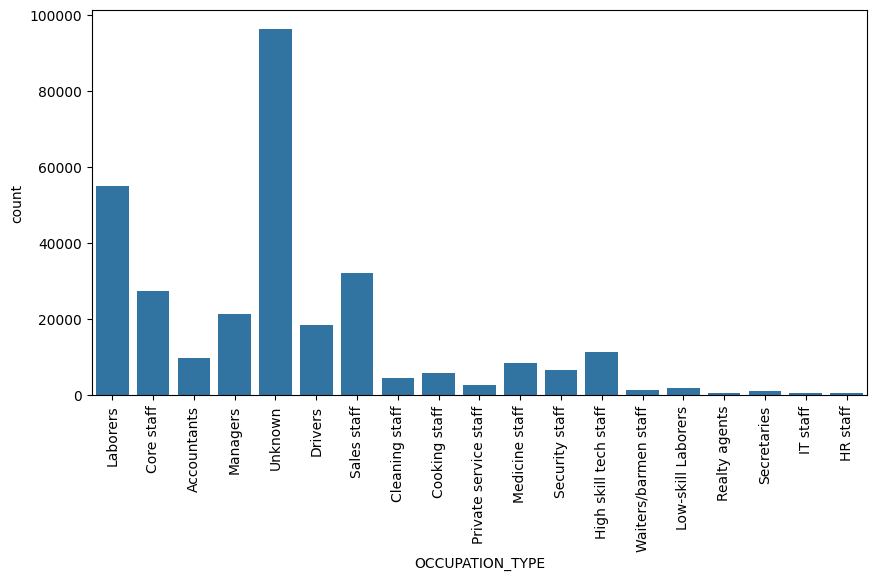

In [53]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
- Якщо поглянути на графік, то найбільшу кількість заявників на кредит мають `Laborers`
- Для імпутації краще залишити дані як є (пропущені значення становлять 31,35%) і не проводити імпутацію за якоюсь константою, як-от мода або мін/макс медіана, якщо це числовий стовпчик, оскільки це може викривити дані в подальших розрахунках.

Існує також можливість імпутації за допомогою більш "розумних" методів, але ми вивчимо їх пізніше, а зараз ми робимо те, що можемо, за допомогою деяких найпростіших перетворень.

### Аналіз стовпця `EXT_SOURCE_3`

- пропущені значення = 19.83%

In [54]:
df.EXT_SOURCE_3.value_counts().head()

EXT_SOURCE_3
0.75    1460
0.71    1315
0.69    1276
0.67    1191
0.65    1154
Name: count, dtype: int64

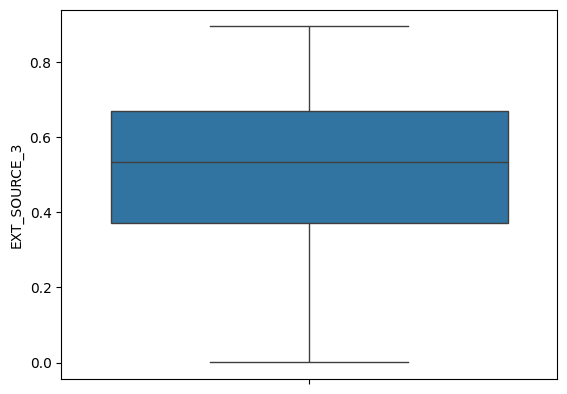

In [55]:
sns.boxplot(df.EXT_SOURCE_3)
plt.show()

Отримання процентильних значень для `EXT_SOURCE_3`

In [56]:
df.EXT_SOURCE_3.quantile(q = [0.25,0.5,0.75,1])

0.25   0.37
0.50   0.54
0.75   0.67
1.00   0.90
Name: EXT_SOURCE_3, dtype: float64

Найбільш повторюване значення в `EXT_SOURCE_3

In [57]:
df.EXT_SOURCE_3.mode()[0]

np.float64(0.746300213050371)

Перевірка середнього значення `EXT_SOURCE_3`

In [58]:
df.EXT_SOURCE_3.mean()

np.float64(0.5108529061799658)

**Спостереження**
-  Дивлячись на діагараму розмаху, медіана становить 0,535276
-  Найчастіше повторюване значення - 0,74630
-  Середнє значення - 0,51085
-  Хоча середнє та медіана є ближчими і можуть бути використані для імпутації, оскільки відсутнє відсоткове значення є більшим (19,83%), краще залишити дані як є і не проводити імпутації. Якщо метод вимагає імпутації, ми можемо імпутувати дані за допомогою медіани і створити ще один стовпчик, в якому буде позначено, які значення були імпутовані.

# ДЗ 1. Аналіз стовпців `AMT_REQ_CREDIT_BUREAU` з пропущеними значеннями

Виведіть середнє, моду, медіану та відсоток відсутніх даних для настуних колонок:

- `AMT_REQ_CREDIT_BUREAU_YEAR`
-	`AMT_REQ_CREDIT_BUREAU_MON`
-	`AMT_REQ_CREDIT_BUREAU_WEEK`

На основі виведених даних напишіть висновок про те, чи варто заповнювати пусті значення і якщо так, то яким чином?

In [59]:
import pandas as pd

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning для людей - Лекціний ноутбук Дослідницького аналізу даних/application_data.csv')

# Перелік колонок, які потрібно аналізувати
columns = [
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK'
]

# Аналіз кожної колонки
for col in columns:
    print(f"\nАналіз стовпця: {col}")
    print(f"Середнє: {df[col].mean()}")
    print(f"Мода: {df[col].mode().iloc[0] if not df[col].mode().empty else 'Немає'}")
    print(f"Медіана: {df[col].median()}")
    percent_missing = df[col].isnull().mean() * 100
    print(f"Відсоток відсутніх значень: {percent_missing:.2f}%")



Аналіз стовпця: AMT_REQ_CREDIT_BUREAU_YEAR
Середнє: 1.899974435321363
Мода: 0.0
Медіана: 1.0
Відсоток відсутніх значень: 13.50%

Аналіз стовпця: AMT_REQ_CREDIT_BUREAU_MON
Середнє: 0.26739526000781977
Мода: 0.0
Медіана: 0.0
Відсоток відсутніх значень: 13.50%

Аналіз стовпця: AMT_REQ_CREDIT_BUREAU_WEEK
Середнє: 0.0343619356973142
Мода: 0.0
Медіана: 0.0
Відсоток відсутніх значень: 13.50%


**Висновок:**

Однозначно, варто заповнити пусті значення у стовпцях Engine Version (60% пропусків) та Engine (38% пропусків), оскільки ігнорування або видалення цих даних призведе до значної втрати інформації та потенційної упередженості в аналізі. Для Engine Version краще використовувати імпутацію на основі кореляції з іншими стовпцями або створити категорію "Невідомо", тоді як для Engine можна застосувати заповнення модою (найчастішим значенням) або модою в межах певних груп. Крім того, стовпці AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_MON та AMT_REQ_CREDIT_BUREAU_WEEK також мають значний відсоток відсутніх значень (13.50% кожен), і їх також варто заповнити. Зважаючи на те, що мода для всіх трьох стовпців дорівнює 0.0, а медіана для MON та WEEK також 0.0, найкращим варіантом для цих трьох стовпців буде заповнення пропусків нулем (0.0), що відображає їх найпоширеніше і медіанне значення, зменшуючи спотворення даних.

## Перевірка стовпців зі значеннями NULL > 0% та < 1%

Створення датафрейму `null_df_under1` з відсотком пропущених значень > 0% та < 1% у кожному стовпці

In [60]:
null_df_under1 = null_df[(null_df['null_percentage'] > 0) & (null_df['null_percentage'] < 1)]

In [61]:
null_df_under1.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
11           NAME_TYPE_SUITE        1292             0.42
92  DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
93  OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94  DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42              EXT_SOURCE_2         660             0.21
10           AMT_GOODS_PRICE         278             0.09

### Аналіз стовпця `NAME_TYPE_SUITE`

In [62]:
null_df_under1[null_df_under1.column_name == 'NAME_TYPE_SUITE']

column_name  null_count  null_percentage
11  NAME_TYPE_SUITE        1292             0.42

In [63]:
df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

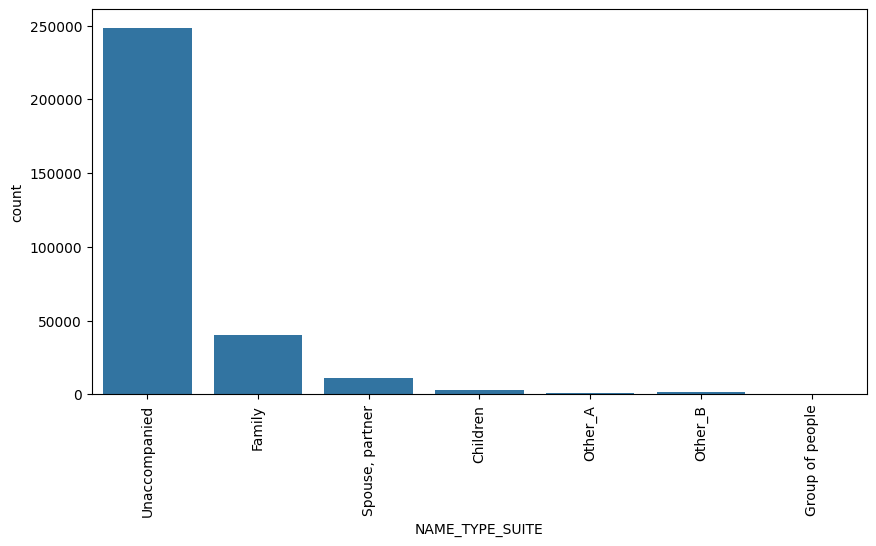

In [64]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
-   Дивлячись на графік, категорія `Unaccompanied` має найбільшу кількість заявників на отримання кредиту. Отже, більшість позичальників наважуються звертатися за кредитом без супроводу.
- Ми можемо продовжити імпутацію `Unaccompanied` в датафреймі, але краше надати перевагу другому варіанту.
- Ми також могли б імпутувати дані зі значенням `NA`, оскільки ця колонка є категоричною.
- Аналогічно, якщо в колонці не вистачає менше 1% даних, ми можемо її опустити. Але якщо ми вилучимо всі дані в усіх стовпчиках, де пропущено <=1% даних, ми можемо вилучити занадто багато даних. Тому я здебільшого зберігаю дані настільки, наскільки це можливо.

In [65]:
df['NAME_TYPE_SUITE'].fillna('NA', inplace=True)

<ipython-input-65-9eba76e3e9b9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NAME_TYPE_SUITE'].fillna('NA', inplace=True)


### Аналіз стовпця `OBS_30_CNT_SOCIAL_CIRCLE`

In [66]:
null_df_under1[null_df_under1.column_name == 'OBS_30_CNT_SOCIAL_CIRCLE']

column_name  null_count  null_percentage
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33

In [67]:
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().head(10)

OBS_30_CNT_SOCIAL_CIRCLE
0.00    163910
1.00     48783
2.00     29808
3.00     20322
4.00     14143
5.00      9553
6.00      6453
7.00      4390
8.00      2967
9.00      2003
Name: count, dtype: int64

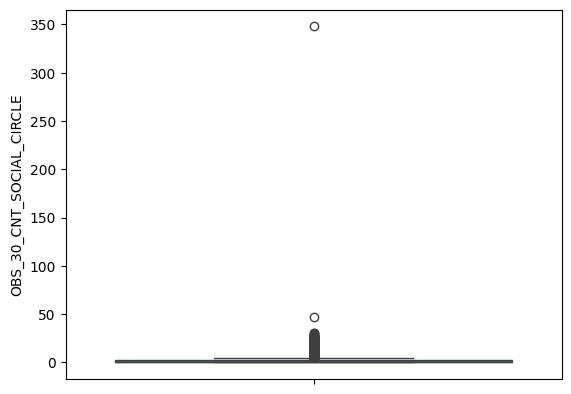

In [68]:
sns.boxplot(df.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

Розрахунок перцентилів `OBS_30_CNT_SOCIAL_CIRCLE`

In [69]:
df.OBS_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,1])

0.25     0.00
0.50     0.00
0.75     2.00
1.00   348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

Найбільш повторюване значення в `OBS_30_CNT_SOCIAL_CIRCLE`

In [70]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]

np.float64(0.0)

Середнє значення `OBS_30_CNT_SOCIAL_CIRCLE`

In [71]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mean()

np.float64(1.4222454239942575)

**Спостереження**
- Дивлячись на діаграму розмаху, медіана дорівнює 0.0
- Найчастіше повторюване значення - 0.0
- Середнє значення - 1,4222
- Є два викидні значення на рівні 50 та 350.
- Медіана і мода близькі (з огляду на діапазон даних у цьому стовпчику) і можуть бути використані для імпутації. Це не призведе до зміщення, оскільки відсоток пропущених значень невеликий (0,33%)

In [72]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

<ipython-input-72-2ec5564a2152>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)


# ДЗ 2. Аналіз і заповнення пустих значень у колонках з малим відсотком пропущених

За прикладом вище проведіть аналіз пропущених значень в колонках
- EXT_SOURCE_2
- AMT_GOODS_PRICE

Для швидшого аналізу рекомендую написати фукнцію, яку Ви зможете викликати для кожної з колонок.

Зробіть висновок, що робити з пропущеними значеннями в кожному випадку і виконанайте ту дію, яку зазначили.


Аналіз стовпця: EXT_SOURCE_2
Відсоток відсутніх значень: 0.21%
Середнє: 0.51
Мода: 0.2858978721410488
Медіана: 0.57


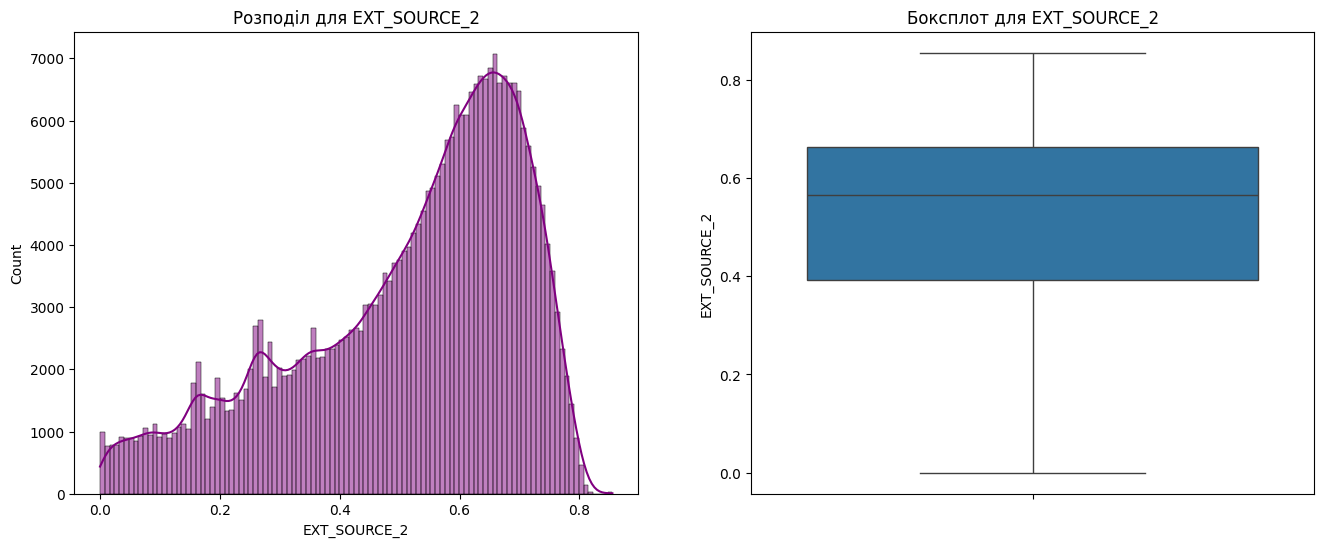

Висновок: Низький відсоток пропущених значень. Можна заповнити медіаною або середнім, або залишити.

Аналіз стовпця: AMT_GOODS_PRICE
Відсоток відсутніх значень: 0.09%
Середнє: 538396.21
Мода: 450000.0
Медіана: 450000.00


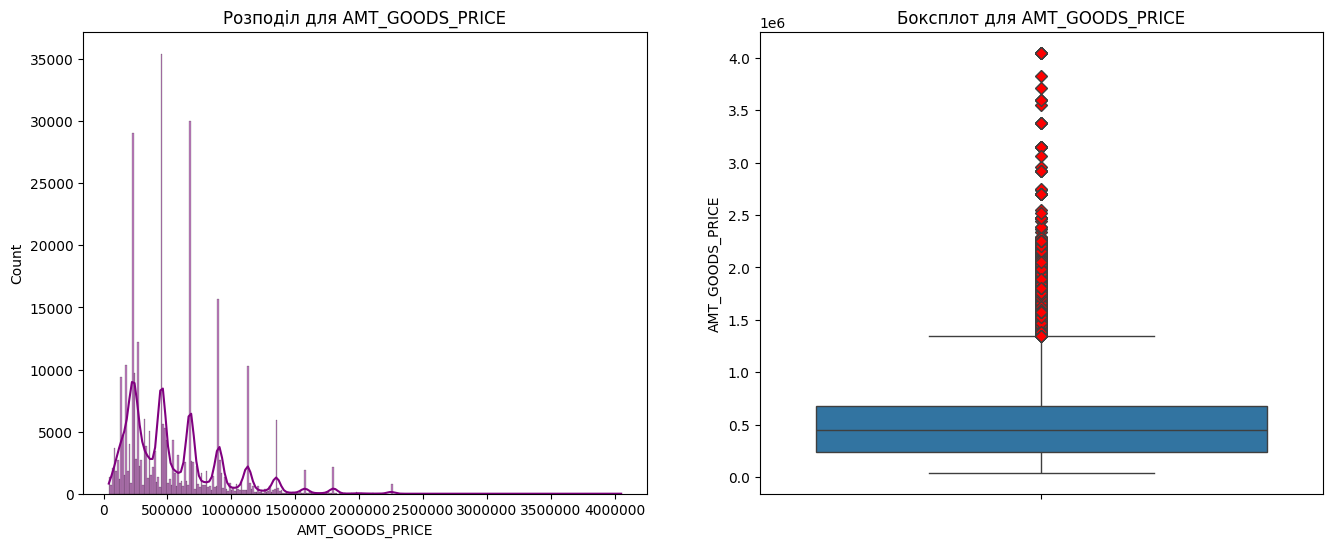

Висновок: Низький відсоток пропущених значень. Можна заповнити медіаною або середнім, або залишити.


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_impute_nulls(df, column):
    """
    Аналізує та заповнює пропущені значення у вказаному стовпці.

    Args:
        df (pd.DataFrame): Вхідний DataFrame.
        column (str): Ім'я стовпця для аналізу.
    """
    print(f"\nАналіз стовпця: {column}")

    # Відсоток пропущених значень
    percent_missing = df[column].isnull().mean() * 100
    print(f"Відсоток відсутніх значень: {percent_missing:.2f}%")

    # Якщо є пропущені значення, виконайте подальший аналіз
    if percent_missing > 0:
        # Середнє, мода, медіана
        if df[column].dtype in ['int64', 'float64']:
            print(f"Середнє: {df[column].mean():.2f}")
            mode_value = df[column].mode()
            print(f"Мода: {mode_value.iloc[0] if not mode_value.empty else 'Немає'}")
            print(f"Медіана: {df[column].median():.2f}")

            # Візуалізація розподілу та викидів
            plt.figure(figsize=(16, 6))
            plt.subplot(1, 2, 1)
            sns.histplot(df[column].dropna(), kde=True, color='purple')
            plt.title(f'Розподіл для {column}')
            plt.ticklabel_format(style='plain', axis='x')

            plt.subplot(1, 2, 2)
            sns.boxplot(y=column, data=df.dropna(subset=[column]), flierprops=dict(markerfacecolor='r', marker='D'))
            plt.title(f'Боксплот для {column}')
            plt.show()

            # Прийняття рішення щодо заповнення
            if percent_missing < 5: # Наприклад, поріг 5%
                print("Висновок: Низький відсоток пропущених значень. Можна заповнити медіаною або середнім, або залишити.")
                # Приклад заповнення медіаною
                # df[column].fillna(df[column].median(), inplace=True)
                # print(f"Заповнено пропущені значення медіаною.")
            else:
                print("Висновок: Вищий відсоток пропущених значень. Залишаємо пропущені значення як є для подальшого аналізу.")
        else:
            # Для категоріальних стовпців
            mode_value = df[column].mode()
            print(f"Мода: {mode_value.iloc[0] if not mode_value.empty else 'Немає'}")
            print("Висновок: Для категоріальних даних можна заповнити модою або створити категорію 'Unknown'.")
            # Приклад заповнення модою
            # df[column].fillna(mode_value.iloc[0] if not mode_value.empty else 'Unknown', inplace=True)
            # print(f"Заповнено пропущені значення модою або 'Unknown'.")
    else:
        print("Висновок: У цьому стовпці немає пропущених значень.")

# Завантаження даних (припускаємо, що DataFrame df вже завантажений)
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning для людей - Лекційний ноутбук Дослідницького аналізу даних/application_data.csv')

# Виклик функції для аналізу стовпців
analyze_and_impute_nulls(df, 'EXT_SOURCE_2')
analyze_and_impute_nulls(df, 'AMT_GOODS_PRICE')

# Робота з неправильними/невідомими значеннями даних

### Аналіз стовпця `CODE_GENDER`

Перевірка діапазону значень

In [74]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Стать має бути тільки чоловіча або жіноча. Значення `XNA` може вказувати на те, що значення не було надано заявником або пропущено кредитним спеціалістом, який перевіряє заявку

In [75]:
df[df['CODE_GENDER'] == 'XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0         207000.00   382500.00   
38566                Y             2         157500.00   270000.00   
83382                Y             1         135000.00   405000.00   
189640               Y             0         247500.00   540000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657      19125.00        337500.00   Unaccompanied               Working   
38566      13500.00        225000.00          Family               Working   
83382      20250.00        225000.00   Unaccompanied               Working   
189640     27000.00        900000.00   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                         0.02      -20232         -10044   
38566                         0.03      -13717          -2797   
83382                         0.04      -10647          -1228   
189640                        0.04       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
35657           -10024.00            -3537        13.00           1   
38566            -2241.00            -4659          NaN           1   
83382             -183.00            -1671          NaN           1   
189640           -4099.00            -2326         8.00           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
35657                1                1                 1           1   
38566                1                1                 1           1   
83382                1                1                 1           1   
189640               1                1                 1           1   

        FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657            0                 NaN             2.00                     3   
38566            0  Low-skill Laborers             4.00                     2   
83382            0          Core staff             3.00                     2   
189640           0                 NaN             2.00                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CI

Оскільки дані виглядають достовірними, ми перевіримо можливість застосування методу імпутації.
- Заявників-жінок удвічі більше, ніж заявників-чоловіків
- Отже, ми прирівняємо `CODE_GENDER` до 'F'

In [76]:
df['CODE_GENDER'] = df['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

Перевірка, чи вилучено `XNA`

In [77]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

### Аналіз стовпця `DAYS_BIRTH`

In [78]:
df['DAYS_BIRTH'].value_counts().head()

DAYS_BIRTH
-13749    43
-13481    42
-10020    41
-18248    41
-15771    40
Name: count, dtype: int64

Існує ~17K+ унікальних записів, всі з яких, схоже, мають від'ємні значення

In [79]:
df['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061])

In [80]:
df['DAYS_BIRTH'].nunique()

17460

In [81]:
df['DAYS_BIRTH'].describe()

count   307511.00
mean    -16037.00
std       4363.99
min     -25229.00
25%     -19682.00
50%     -15750.00
75%     -12413.00
max      -7489.00
Name: DAYS_BIRTH, dtype: float64

Перетворення `Days Birth` на додатні дні

In [82]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: -x if x < 0 else x)

In [83]:
df['DAYS_BIRTH'].value_counts()

DAYS_BIRTH
13749    43
13481    42
10020    41
18248    41
15771    40
         ..
24958     1
25048     1
24980     1
25061     1
25045     1
Name: count, Length: 17460, dtype: int64

Всі дні в `DAYS_BIRTH` мають додатні значення - це може бути зручніше для аналізу.

#### Створимо нову колонку `YEARS_BIRTH` для зручності аналізу

In [84]:
df['YEARS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: round(x/365))

### Аналіз стовпця `NAME_FAMILY_STATUS`

Перевірка діапазону значень

In [85]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

Стать має бути тільки чоловіча або жіноча. Значення `Unknown` може означати, що значення не було вказане заявником або пропущене кредитним спеціалістом, який перевіряє заявку

In [86]:
df[df['NAME_FAMILY_STATUS'] == 'Unknown']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0         450000.00   675000.00   
187348               Y             0         202500.00   585000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982      33750.00              NaN              NA  Commercial associate   
187348     29250.00              NaN              NA  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                         0.02       12396          -1161   
187348                        0.03       12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
41982            -3265.00            -4489          NaN           1   
187348           -1597.00            -1571          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
41982                1                1                 1           1   
187348               1                0                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982            0        Managers              NaN                     2   
187348           0     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  \
41982                         1               Insurance          0.63   
187348                        0  Business Entity Type 2           NaN   

        EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
41982           0.70           NaN             NaN               NaN   
187348          0.65          0.67            0.10              0.05   

        YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
41982                           NaN              NaN             NaN   
187348                         1.00             0.96            0.01   

        ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
41982             NaN            NaN            NaN            NaN   
187348           0.08           0.07           0.38           0.42   

        LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
41982            NaN                   NaN             NaN   
187348           NaN                  0.08            0.09   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
41982                       NaN                NaN              NaN   
187348                     0.00               0.00             0.10   

        BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
41982                 NaN                           NaN               NaN   
187348               0.05                          1.00              0.96   

  

In [87]:
df['NAME_FAMILY_STATUS'].value_counts(normalize = True) * 100

NAME_FAMILY_STATUS
Married                63.88
Single / not married   14.78
Civil marriage          9.68
Separated               6.43
Widow                   5.23
Unknown                 0.00
Name: proportion, dtype: float64

Оскільки дані виглядають достовірними, ми продовжимо перевірку методу імпутації.
- Одружені заявники складають понад 63% заявників.
- Отже, ми прирівняємо `NAME_FAMILY_STATUS` до `Married`.

In [88]:
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)

Перевірка чи вилучено `Unknown`

In [89]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

### Аналіз стовпця`DAYS_EMPLOYED`

In [90]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
Name: count, dtype: int64

In [91]:
df['DAYS_EMPLOYED'].value_counts(normalize = True) * 100

DAYS_EMPLOYED
 365243   18.01
-200       0.05
-224       0.05
-230       0.05
-199       0.05
           ... 
-11471     0.00
-12878     0.00
-10573     0.00
-12990     0.00
-14184     0.00
Name: proportion, Length: 12574, dtype: float64

In [92]:
len(df[df['DAYS_EMPLOYED'] < 365243])

252137

In [93]:
df[df['DAYS_EMPLOYED'] < 365243].DAYS_EMPLOYED.value_counts()

DAYS_EMPLOYED
-200      156
-224      152
-230      151
-199      151
-212      150
         ... 
-12037      1
-16554      1
-11276      1
-8348       1
-9129       1
Name: count, Length: 12573, dtype: int64

In [94]:
df['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694])

In [95]:
df['DAYS_EMPLOYED'].nunique()

12574

**Спостереження**
- Існує ~55K+ записів, для яких `DAYS_EMPLOYED` дорівнює 365243 дням
- Решта 252K+ записів мають від'ємне значення днів
- Існує 12 574 унікальних значень для `DAYS_EMPLOYED`

 - Колонка `DAYS_EMPLOYED` вказує на те, за скільки днів до подачі заявки особа почала поточну роботу, заявник/кредитний спеціаліст повинен ввести від'ємні значення, щоб вказати дні, що передують даті подачі заявки.<br>
 - Ми конвертуємо від'ємні значення в `DAYS_EMPLOYED` в додатні дні, щоб стандартизувати дні під час використання в розрахунках

In [96]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: -x if x < 0 else x)

In [97]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
365243    55374
200         156
224         152
230         151
199         151
Name: count, dtype: int64

Ми бачимо, що всі дні в `DAYS_EMPLOYED` мають додатні значення

**Для ~55K+ записів, для яких `DAYS_EMPLOYED` становить 365243 дні**
- Конвертуючи це в роки, ми отримуємо 1000 років, які фізично неможливо використати для працевлаштування заявника
- Це відповідає 18% даних і не може бути аномалією
- Вони можуть бути або пенсіонерами, або безробітними, і, дивлячись на дані, наш висновок є правильним

> Є два способи впоратися з цим
>> 1) Ми залишаємо дані такими, якими вони є, і враховуємо це під час аналізу АБО  <br>
>> 2) Ми розраховуємо середню кількість днів зайнятості без урахування цієї категорії та вписуємо її замість 365243 днів для пенсіонерів. <br>
>> Для безробітних кількість днів зайнятості може дорівнювати 0

*Примітка*
 - Під час розрахунків у цьому стовпчику ми повинні враховувати цей сценарій, оскільки інакше він спотворює наші результати

In [98]:
df[df['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64

#### Створимо нову колонку `YEARS_EMPLOYED` для зручності аналізу

In [99]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_REGISTRATION`

In [100]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
-1.00    113
-7.00     98
-6.00     96
-4.00     92
-2.00     92
Name: count, dtype: int64

In [101]:
df['DAYS_REGISTRATION'].value_counts(normalize = True).head()

DAYS_REGISTRATION
-1.00   0.00
-7.00   0.00
-6.00   0.00
-4.00   0.00
-2.00   0.00
Name: proportion, dtype: float64

In [102]:
df['DAYS_REGISTRATION'].unique()

array([ -3648.,  -1186.,  -4260., ..., -16396., -14558., -14798.])

In [103]:
df['DAYS_REGISTRATION'].nunique()

15688

Перетворення `DAYS_REGISTRATION` в додатні дні

In [104]:
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: -x if x < 0 else x)

In [105]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
1.00    113
7.00     98
6.00     96
4.00     92
2.00     92
Name: count, dtype: int64

Всі дні в `DAYS_REGISTRATION` мають додатні значення

#### Створимо нову колонку `YEARS_REGISTRATION` для зручності аналізу

In [106]:
df['YEARS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_ID_PUBLISH`

In [107]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
Name: count, dtype: int64

In [108]:
df['DAYS_ID_PUBLISH'].value_counts(normalize = True).head()

DAYS_ID_PUBLISH
-4053   0.00
-4095   0.00
-4046   0.00
-4417   0.00
-4256   0.00
Name: proportion, dtype: float64

In [109]:
df['DAYS_ID_PUBLISH'].unique()

array([-2120,  -291, -2531, ..., -6194, -5854, -6211])

In [110]:
df['DAYS_ID_PUBLISH'].nunique()

6168

Перетворення `DAYS_ID_PUBLISH` в додатні дні

In [111]:
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: -x if x < 0 else x)

In [112]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
4053    169
4095    162
4046    161
4417    159
4256    158
Name: count, dtype: int64

Всі дні в `DAYS_ID_PUBLISH` мають додатні значення

#### Створимо нову колонку `YEARS_ID_PUBLISH` для зручності аналізу

In [113]:
df['YEARS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_LAST_PHONE_CHANGE`

In [114]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00     37672
-1.00     2812
-2.00     2318
-3.00     1763
-4.00     1285
Name: count, dtype: int64

In [115]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize = True).head()

DAYS_LAST_PHONE_CHANGE
0.00    0.12
-1.00   0.01
-2.00   0.01
-3.00   0.01
-4.00   0.00
Name: proportion, dtype: float64

In [116]:
df['DAYS_LAST_PHONE_CHANGE'].unique()

array([-1134.,  -828.,  -815., ..., -3988., -3899., -3538.])

In [117]:
df['DAYS_LAST_PHONE_CHANGE'].nunique()

3773

Перетворення `DAYS_LAST_PHONE_CHANGE` в додатні дні

In [118]:
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: -x if x < 0 else x)

In [119]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00    37672
1.00     2812
2.00     2318
3.00     1763
4.00     1285
Name: count, dtype: int64

Всі дні в `DAYS_LAST_PHONE_CHANGE` мають додатні значення

#### Створення нової колонки `YEARS_LAST_PHONE_CHANGE` для зручності аналізу

In [120]:
df['YEARS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: round(x/365,0))

# Автоматичні функції

### Створення функції `age_cat` для категоризації `YEARS_BORNING`

In [124]:
def age_cat(years):
    if years <= 20:
        return '0-20'
    elif years > 20 and years <= 30:
        return '20-30'
    elif years > 30 and years <= 40:
        return '30-40'
    elif years > 40 and years <= 50:
        return '40-50'
    elif years > 50 and years <= 60:
        return '50-60'
    elif years > 60 and years <= 70:
        return '60-70'
    elif years > 70:
        return '70+'

### Одномірний (категоріальний vs цільовий) та двомірний (категоріальний vs категоріальний) аналіз (гістограма) - категоріальні стовпчики

In [125]:
import matplotlib.pyplot as plt


def bi_cat_countplot(df, column, hue_column):
    unique_hue_values = df[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,6)

    pltname = f'Нормалізований розподіл значень за категорією: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    pltname = f'Кількість даних за категорією: {column}'
    counts = df.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container)


def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='TARGET' )


def bi_countplot_target(df0, df1, column, hue_column):
  pltname = 'Клієнт зі складнощами щодо платності'
  print(pltname.upper())
  bi_cat_countplot(df1, column, hue_column)
  plt.show()

  pltname = 'Клієнти зі своєчасними платежами'
  print(pltname.upper())
  bi_cat_countplot(df0, column, hue_column)
  plt.show()


### Обчислення мінімального та максимального діапазону відхилень для числових стовпців

In [126]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

# Робота з викидами для числових стовпців

In [127]:
import warnings

def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Графік розподілу для ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Боксплот для ' + column
      plt.title(pltname)

      plt.show()

### Аналіз стовпця`CNT_CHILDREN`

In [128]:
df['CNT_CHILDREN'].value_counts().sort_values(ascending = False).head()

CNT_CHILDREN
0    215371
1     61119
2     26749
3      3717
4       429
Name: count, dtype: int64

In [129]:
(df['CNT_CHILDREN'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

CNT_CHILDREN
0   70.04
1   19.88
2    8.70
3    1.21
4    0.14
Name: proportion, dtype: float64

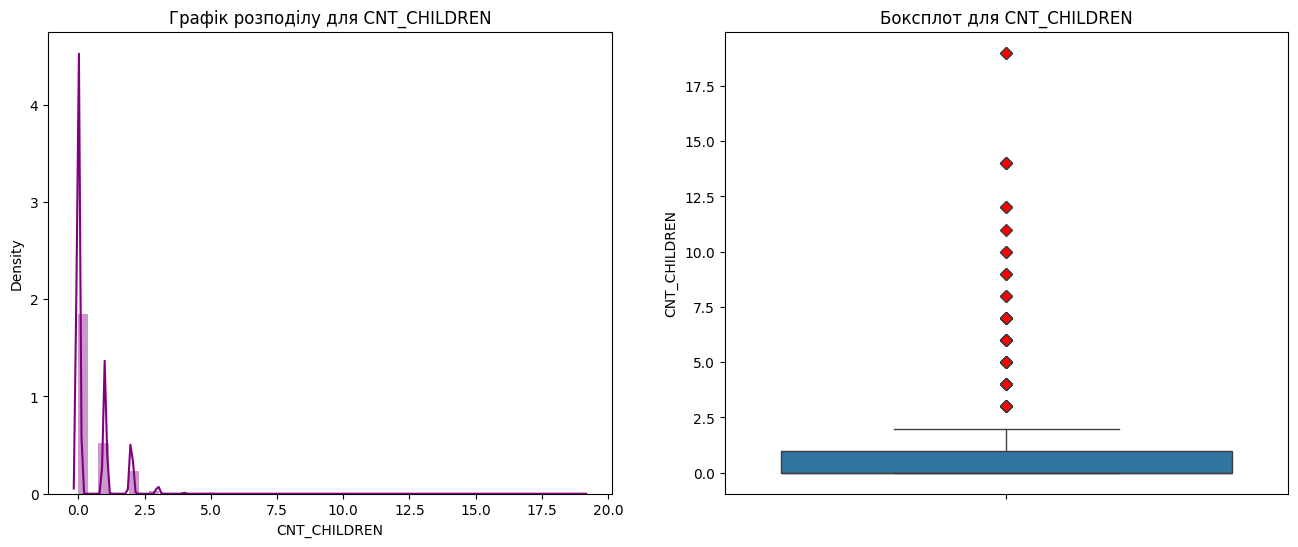

In [130]:
dist_box(df,'CNT_CHILDREN')

Розрахуємо IQR (Inter Quartile range)

In [131]:
Q1 = df['CNT_CHILDREN'].quantile(0.25)
Q3 = df['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


Значення *до* (Q1 - 1,5 * IQR) та *після* (Q3 + 1,5 * IQR) є викидами

In [132]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

Мінімальне значення, до якого існують викиди: -1.5
Максимальне значення, після якого існують викиди: 2.5


**Спостереження**
- Дивлячись на дані, ми бачимо, що кількість заявників, які мають більше 7 дітей, є дуже мінімальною (2 або 3 в кожній категорії)
- Крім того, дивлячись на дані для заявників з 10 дітьми, заявники мають лише 31 й 41 рік відповідно. Це виглядає як одиничний випадок й може розглядатися як відхилення від норми
- Як дистрибутивні, так і діаграми розмаху чітко показують, що значення, які перевищують значення 2.5, є відхиленнями від норми.

**Висновок**
- Заявники, які мають 3 або більше дітей, є випадками, що відхиляються від норми. Ми можемо надати спеціальний аналіз для цих випадків.

### Аналіз стовпця `AMT_INCOME_TOTAL`

In [133]:
df['AMT_INCOME_TOTAL'].value_counts().sort_values(ascending = False).head()

AMT_INCOME_TOTAL
135000.00    35750
112500.00    31019
157500.00    26556
180000.00    24719
90000.00     22483
Name: count, dtype: int64

In [134]:
(df['AMT_INCOME_TOTAL'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_INCOME_TOTAL
135000.00   11.63
112500.00   10.09
157500.00    8.64
180000.00    8.04
90000.00     7.31
Name: proportion, dtype: float64

In [135]:
df['AMT_INCOME_TOTAL'].describe(percentiles = [0.75,0.99,0.999])

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
50%        147150.00
75%        202500.00
99%        472500.00
99.9%      900000.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

Побудуємо графік для `AMT_INCOME_TOTAL`

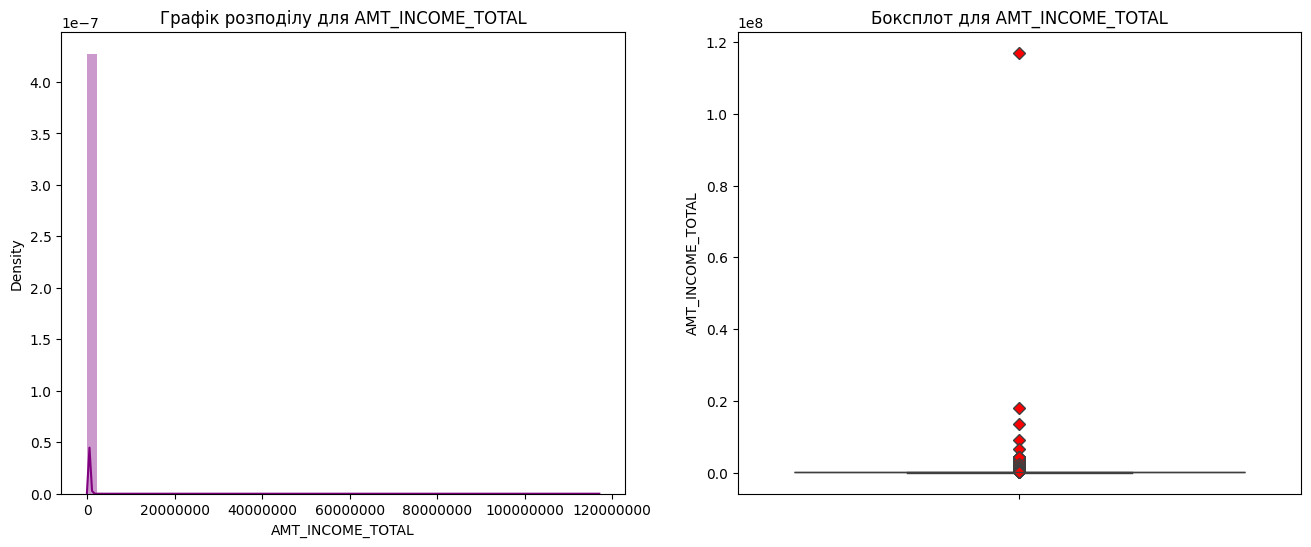

In [136]:
dist_box(df,'AMT_INCOME_TOTAL')

- Графіки кінцевого результату дуже тонкі, й ми можемо спостерігати викид близько ~120 мільйонів.
- Давайте побудуємо графік, розглядаючи лише дохід нижче 99,9% значення, тобто 900 тисяч.

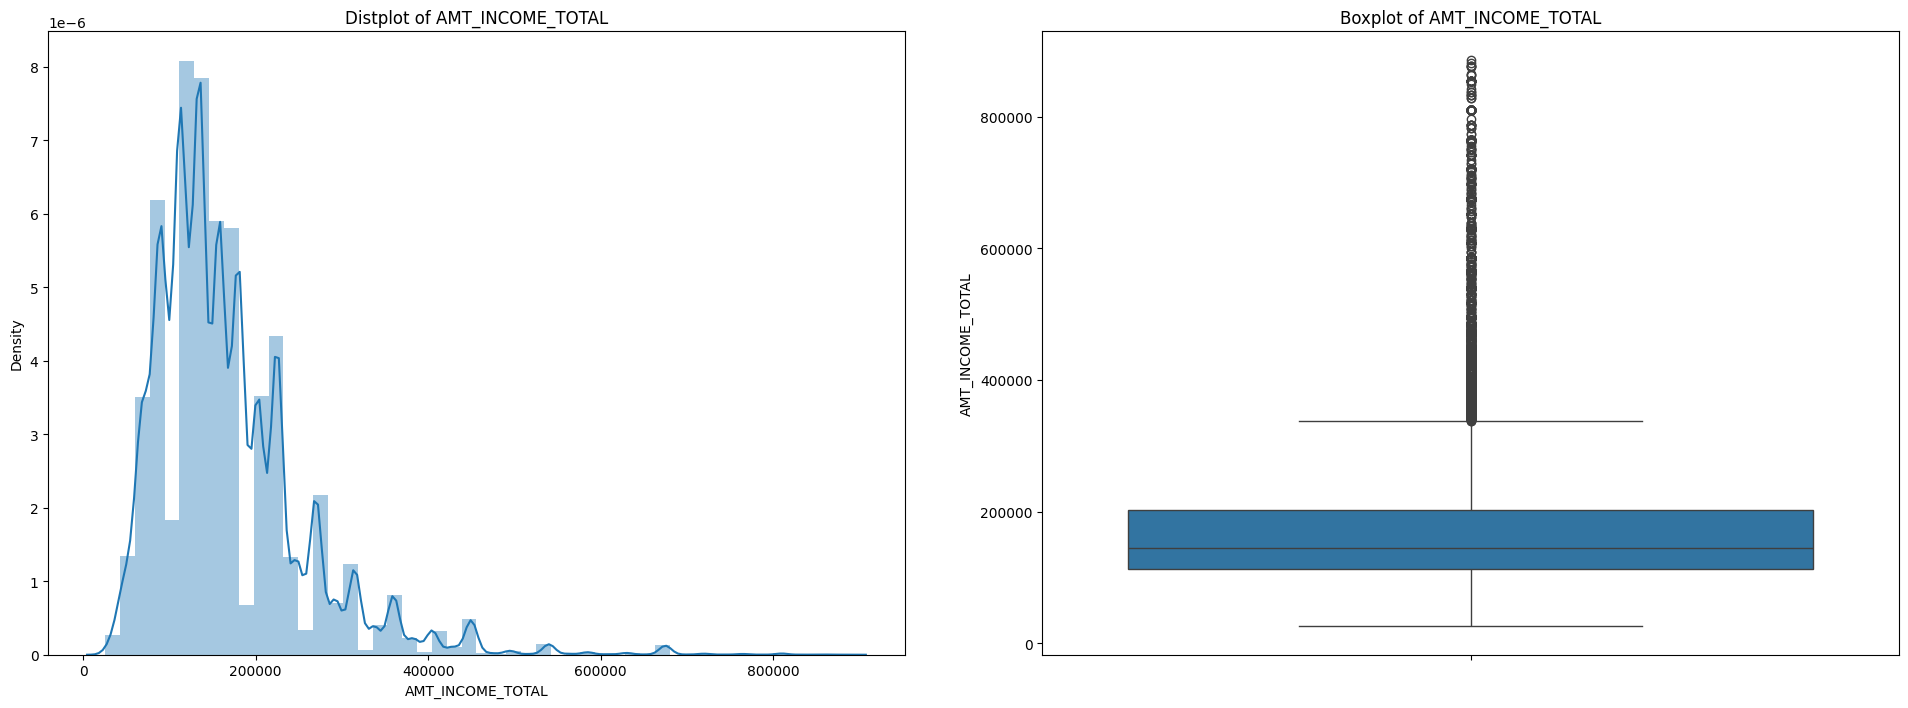

In [137]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Distplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Boxplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

Тепер ми можемо чітко побачити розподіл і діапазон даних на обох графіках.
 - Це означає, що значення понад 900 тис. грн доходу явно є викидами

In [138]:
df[df['AMT_INCOME_TOTAL'] > 900000].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1504      101769       0    Revolving loans           M            Y   
1723      102015       0         Cash loans           F            N   
3371      103938       0         Cash loans           F            N   
4603      105384       0    Revolving loans           F            Y   
5673      106637       0         Cash loans           M            Y   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1504               Y             0        1080000.00   180000.00      9000.00   
1723               Y             0        1935000.00   269550.00     10534.50   
3371               N             1        1350000.00  2410380.00    109053.00   
4603               Y             0        1350000.00   405000.00     20250.00   
5673               Y             3         967500.00   450000.00     30073.50   

      AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1504        180000.00   Unaccompanied  Commercial associate   
1723        225000.00   Unaccompanied             Pensioner   
3371       2250000.00              NA  Commercial associate   
4603        405000.00   Unaccompanied  Commercial associate   
5673        450000.00   Unaccompanied  Commercial associate   

                NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1504               Higher education            Married  House / apartment   
1723  Secondary / secondary special            Married  House / apartment   
3371               Higher education            Married  House / apartment   
4603               Higher education            Married  House / apartment   
5673               Higher education            Married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
1504                        0.07       13633           5536   
1723                        0.01       18636         365243   
3371                        0.07       12213            843   
4603                        0.02       14781           4768   
5673                        0.05       11901            546   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
1504               3.00             4971         7.00           1   
1723            3401.00             2168          NaN           1   
3371             757.00             4132          NaN           1   
4603            3469.00             4045        11.00           1   
5673            2932.00              215        64.00           1   

      FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
1504               1                0                 1           0   
1723               0                0                 1           1   
3371               1                0                 1           1   
4603               1                0                 1           0   
5673               1                0                 1           0   

      FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1504           0             NaN             2.00                     1   
1723           0             NaN             2.00                     2   
3371           0        Managers             3.00                     1   
4603           0        Managers             2.00                     2   
5673           0        Managers             5.00                     1   

      REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1504                            1                     FRIDAY   
1723                            2                     MONDAY   
3371                            1                     SUNDAY   
4603                            2                    TUESDAY   
5673                            1                     MONDAY   

      HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1504                       13                           0   
1723                       11                           0   
3371

**Спостереження**
- Дивлячись на дані, ми бачимо, що дохід понад 900 тис. грн (99,9% значення) є викидом
- Як діаграма розподілу, так і діаграма розмаху чітко показують нам ту саму тенденцію

**Висновок**
- Апліканти з доходом понад 900 тис. грн (99,9% значення) є викидами

# ДЗ 3. Аналіз викидів

Подібно до прикладу, проаналізуйте на викиди колонок
- `CNT_FAM_MEMBERS`
- `AMT_ANNUITY`

Зазначте, які значення в них можна вважати викидами.

Аналіз стовпця: CNT_FAM_MEMBERS
CNT_FAM_MEMBERS
2.00    158357
1.00     67847
3.00     52601
4.00     24697
5.00      3478
Name: count, dtype: int64
CNT_FAM_MEMBERS
2.00   51.50
1.00   22.06
3.00   17.11
4.00    8.03
5.00    1.13
Name: proportion, dtype: float64


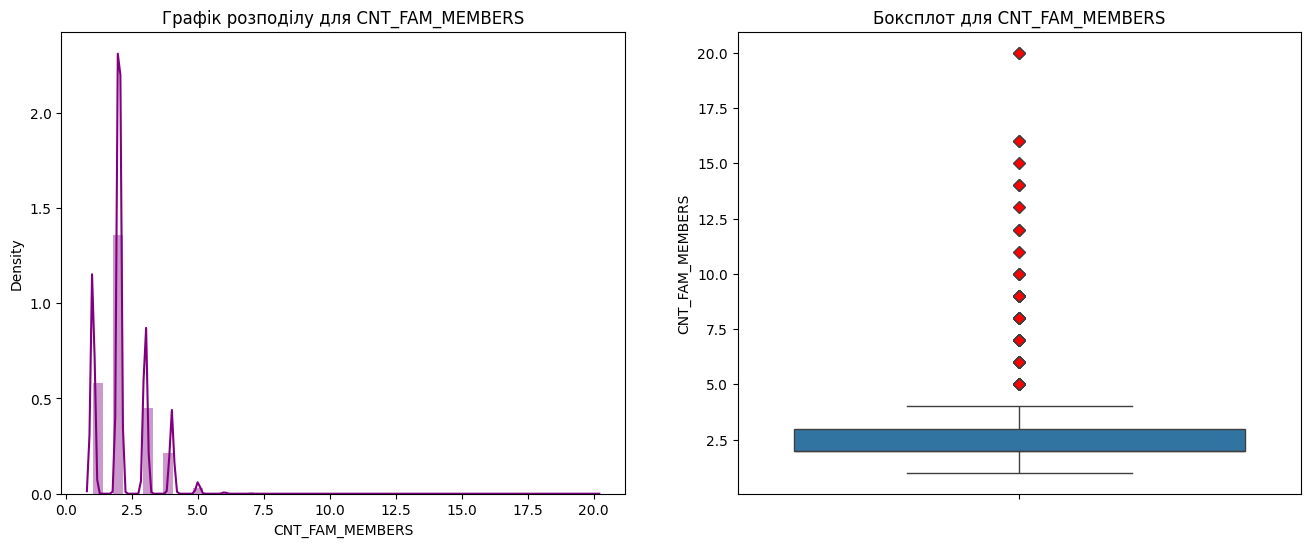


IQR для CNT_FAM_MEMBERS: 1.0
Мінімальне значення, до якого існують викиди: 0.5
Максимальне значення, після якого існують викиди: 4.5
--------------------------------------------------


In [139]:
# Аналіз стовпця CNT_FAM_MEMBERS
print("Аналіз стовпця: CNT_FAM_MEMBERS")
print(df['CNT_FAM_MEMBERS'].value_counts().sort_values(ascending = False).head())
print((df['CNT_FAM_MEMBERS'].value_counts(normalize = True).sort_values(ascending = False) * 100).head())

dist_box(df,'CNT_FAM_MEMBERS')

# Розрахунок IQR
Q1 = df['CNT_FAM_MEMBERS'].quantile(0.25)
Q3 = df['CNT_FAM_MEMBERS'].quantile(0.75)
IQR = Q3 - Q1
print(f"\nIQR для CNT_FAM_MEMBERS: {IQR}")

# Розрахунок значень викидів
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print(f"Мінімальне значення, до якого існують викиди: {Min_value}")
print(f"Максимальне значення, після якого існують викиди: {Max_value}")

print("-" * 50) # Розділювач для кращого читання

# Розбиття на біни безперервних колонок для аналізу

### Категоризація стовпця `AMT_GOODS_PRICE

In [140]:
df['AMT_GOODS_PRICE'].value_counts().sort_values(ascending = False).head()

AMT_GOODS_PRICE
450000.00    26022
225000.00    25282
675000.00    24962
900000.00    15416
270000.00    11428
Name: count, dtype: int64

In [141]:
(df['AMT_GOODS_PRICE'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_GOODS_PRICE
450000.00   8.47
225000.00   8.23
675000.00   8.12
900000.00   5.02
270000.00   3.72
Name: proportion, dtype: float64

Подивимось статистичний звіт для `AMT_GOODS_PRICE

In [142]:
df['AMT_GOODS_PRICE'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count     307233.00
mean      538396.21
std       369446.46
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
99%      1800000.00
99.99%   2934964.80
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

Розподілимо значення в `AMT_GOODS_PRICE` на 5 бінів і створимо новий стовпець `AMT_GOODS_PRICE_CATEGORY`.

In [143]:
df['AMT_GOODS_PRICE_CATEGORY'] = pd.cut(df['AMT_GOODS_PRICE'],
                                        bins = 5, labels = ['very low', 'low', 'medium', 'high', 'very high'])

Перевірка заповнення значень згідно з очікуванням

In [144]:
df['AMT_GOODS_PRICE_CATEGORY'].value_counts()

AMT_GOODS_PRICE_CATEGORY
very low     246973
low           56087
medium         4108
high             47
very high        18
Name: count, dtype: int64

### Категоризація стовпця `YEARS_BIRTH`

Ми будемо класифікувати `YEARS_BIRTH` замість `DAYS_BIRTH`, оскільки роки легше інтерпретувати, ніж дні

In [145]:
df['YEARS_BIRTH'].value_counts().sort_values(ascending = False).head()

YEARS_BIRTH
39    9023
38    8793
37    8727
40    8602
41    8495
Name: count, dtype: int64

In [146]:
(df['YEARS_BIRTH'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_BIRTH
39   2.93
38   2.86
37   2.84
40   2.80
41   2.76
Name: proportion, dtype: float64

Подивимось статистичний звіт для  `YEARS_BIRTH`

In [147]:
df['YEARS_BIRTH'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         43.94
std          11.96
min          21.00
25%          34.00
50%          43.00
75%          54.00
99%          67.00
99.99%       69.00
max          69.00
Name: YEARS_BIRTH, dtype: float64

Категоризуймо значення з `YEARS_BIRTH` у новий стовпець `YEARS_BIRTH_CATEGORY`.

In [148]:
df['YEARS_BIRTH_CATEGORY'] = df['YEARS_BIRTH'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [149]:
df['YEARS_BIRTH_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_BIRTH_CATEGORY
30-40    82770
40-50    75509
50-60    67955
20-30    48869
60-70    32408
Name: count, dtype: int64

### Категоризація стовпця `YEARS_REGISTRATION`

Ми будемо класифікувати `YEARS_REGISTRATION` замість `DAYS_REGISTRATION`, оскільки роки легше інтерпретувати, ніж дні

In [150]:
df['YEARS_REGISTRATION'].value_counts().sort_values(ascending = False).head()

YEARS_REGISTRATION
1     15661
2     15564
3     13894
13    12866
12    12697
Name: count, dtype: int64

In [151]:
(df['YEARS_REGISTRATION'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_REGISTRATION
1    5.09
2    5.06
3    4.52
13   4.18
12   4.13
Name: proportion, dtype: float64

Подивимось статистичний звіт для `YEARS_REGISTRATION`

In [152]:
df['YEARS_REGISTRATION'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         13.66
std           9.66
min           0.00
25%           6.00
50%          12.00
75%          20.00
99%          38.00
99.99%       54.25
max          68.00
Name: YEARS_REGISTRATION, dtype: float64

Категоризуймо значення з `YEARS_REGISTRATION` в новий стовпець `YEARS_REGISTRATION_CATEGORY`.

In [153]:
df['YEARS_REGISTRATION_CATEGORY'] = df['YEARS_REGISTRATION'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [154]:
df['YEARS_REGISTRATION_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_REGISTRATION_CATEGORY
0-20     230697
20-30     59288
30-40     16051
40-50      1406
50-60        60
60-70         9
Name: count, dtype: int64

# Зберігання оновлених даних зі стисненням

In [155]:
filename = "/content/drive/MyDrive/Colab Notebooks/Machine Learning для людей - Лекціний ноутбук Дослідницького аналізу даних/application_data_processed.csv"
compression_options = dict(method='zip', archive_name=f'{filename}.csv')
df.to_csv(f'{filename}.zip', compression=compression_options, index=False)

# Перевірка дисбалансу для цільового стовпця `TARGET`

### Аналіз стовпця `TARGET`

In [156]:
df['TARGET'].value_counts().sort_values(ascending = False)

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [157]:
df['TARGET'].value_counts(normalize = True).sort_values(ascending = False) * 100

TARGET
0   91.93
1    8.07
Name: proportion, dtype: float64

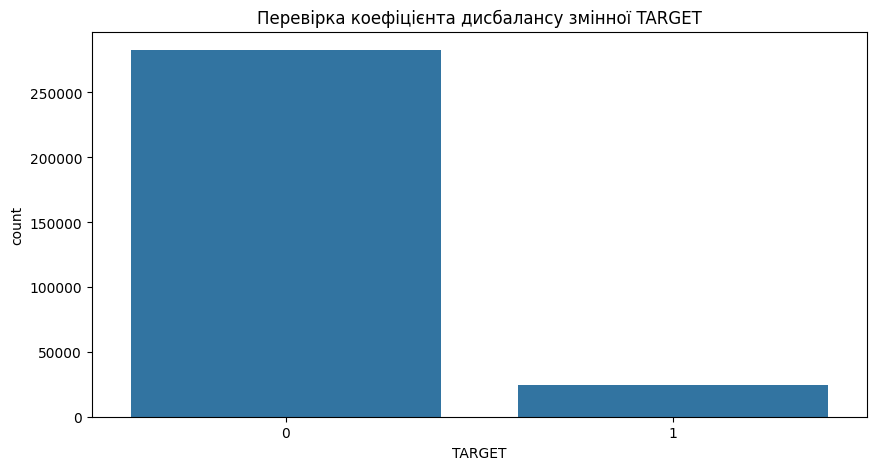

In [158]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['TARGET'], data = df)
plt.title('Перевірка коефіцієнта дисбалансу змінної TARGET')
plt.show()

**Спостереження**

- Ми маємо дисбаланс у змінній `TARGET` на основі % спостережень
 - Значення `TARGET` 1 - це клієнт, який має труднощі з оплатою (прострочення платежу більше ніж на X днів принаймні за одним з перших Y платежів за кредитом). Це лише 8,07% даних
 - Значення `TARGET` 0 - всі інші випадки, окрім 1. Це 91,93% даних

# Розподіл даних на основі `TARGET`

### Створіть новий фрейм даних зі значенням `TARGET` 1
- Значення `TARGET` 1 представляє клієнта з платіжними труднощами (він/вона прострочив платіж більш ніж на X днів принаймні по одному з перших Y платежів за кредитом). Це лише 8,07% даних

In [159]:
df1 = df[df['TARGET'] == 1]

In [160]:
df1.TARGET.value_counts()

TARGET
1    24825
Name: count, dtype: int64

### Створити новий фрейм даних зі значенням `TARGET` 0
- Значення `TARGET` 0 представляє всі інші випадки, крім 1. Це 91.93% даних

In [161]:
df0 = df[df['TARGET'] == 0]

In [162]:
df0.TARGET.value_counts()

TARGET
0    282686
Name: count, dtype: int64

# Одномірний аналіз категоріальних змінних

### Аналіз стовпця `NAME_CONTRACT_TYPE`

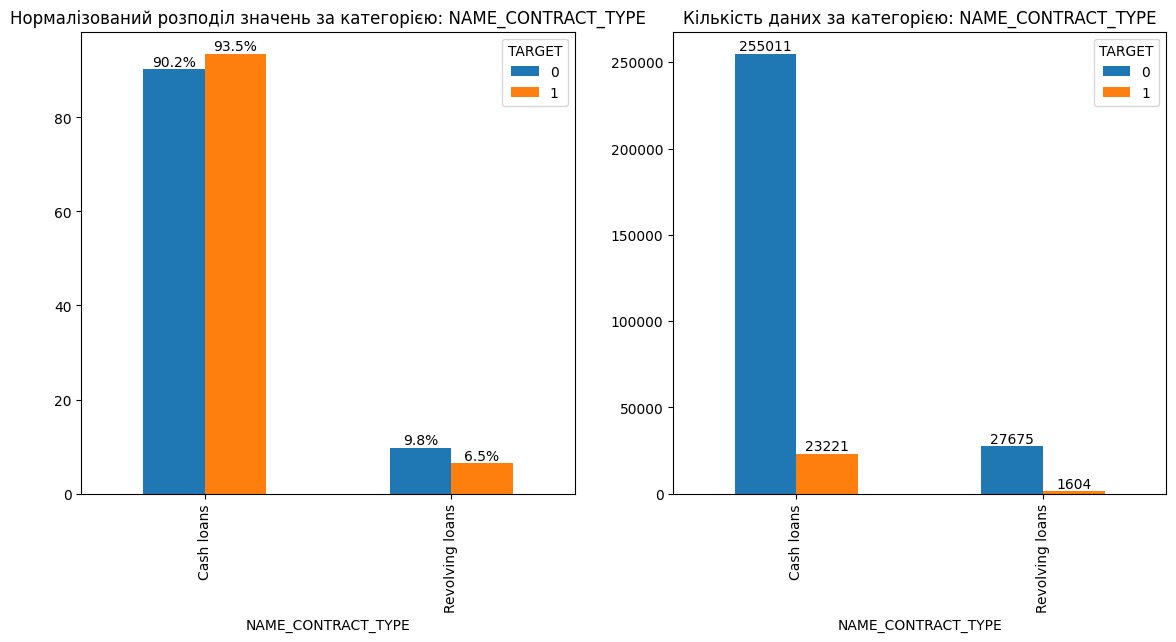

In [163]:
uni_cat_target_compare(df, 'NAME_CONTRACT_TYPE')

**Спостереження**

- Дивлячись на гістограми, ми не бачимо суттєвих відмінностей у `NAME_CONTRACT_TYPE` між клієнтами, які мають труднощі з оплатою, та клієнтами, які платять вчасно

**Висновок**
- Колонка `NAME_CONTRACT_TYPE` не надає жодних переконливих доказів на користь клієнтів, які мають труднощі з оплатою АБО вчасно сплачують

# ДЗ 4. Одновимірний аналіз категоріальної колонки

За наведеним прикладом вище, проведіть аналіз залежності між категоріальною колонкою і цільовою для колонок
- CODE_GENDER
- FLAG_OWN_CAR

Опціонально (для тих, кому цікаво дослідити більше даних)
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS


Чи є вплив цих змінних на цільову та який саме?

Крок 1: Аналіз стовпця CODE_GENDER

Аналіз стовпця: CODE_GENDER


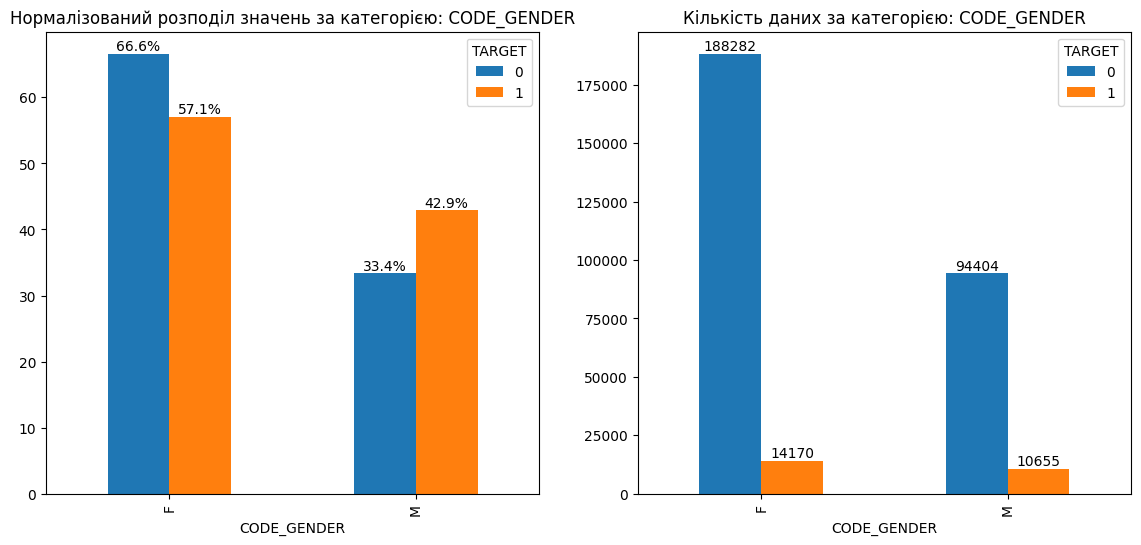

In [164]:
print("Аналіз стовпця: CODE_GENDER")
uni_cat_target_compare(df, 'CODE_GENDER')

Крок 2: Аналіз стовпця FLAG_OWN_CAR


Аналіз стовпця: FLAG_OWN_CAR


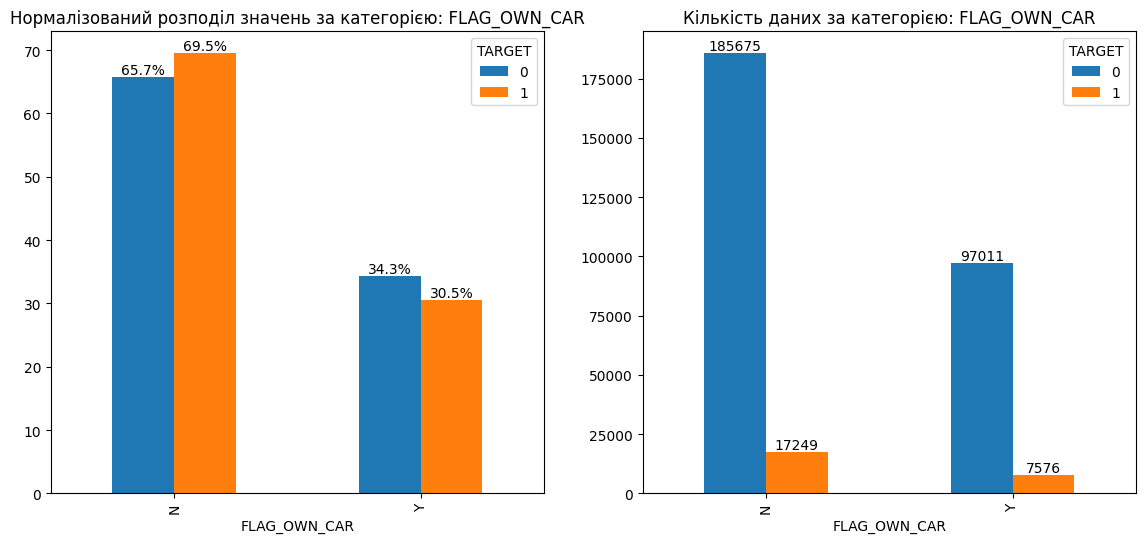

In [165]:
print("\nАналіз стовпця: FLAG_OWN_CAR")
uni_cat_target_compare(df, 'FLAG_OWN_CAR')

Крок 3: Аналіз опціональних стовпців


Аналіз стовпця: NAME_INCOME_TYPE

Аналіз стовпця: NAME_EDUCATION_TYPE

Аналіз стовпця: NAME_FAMILY_STATUS


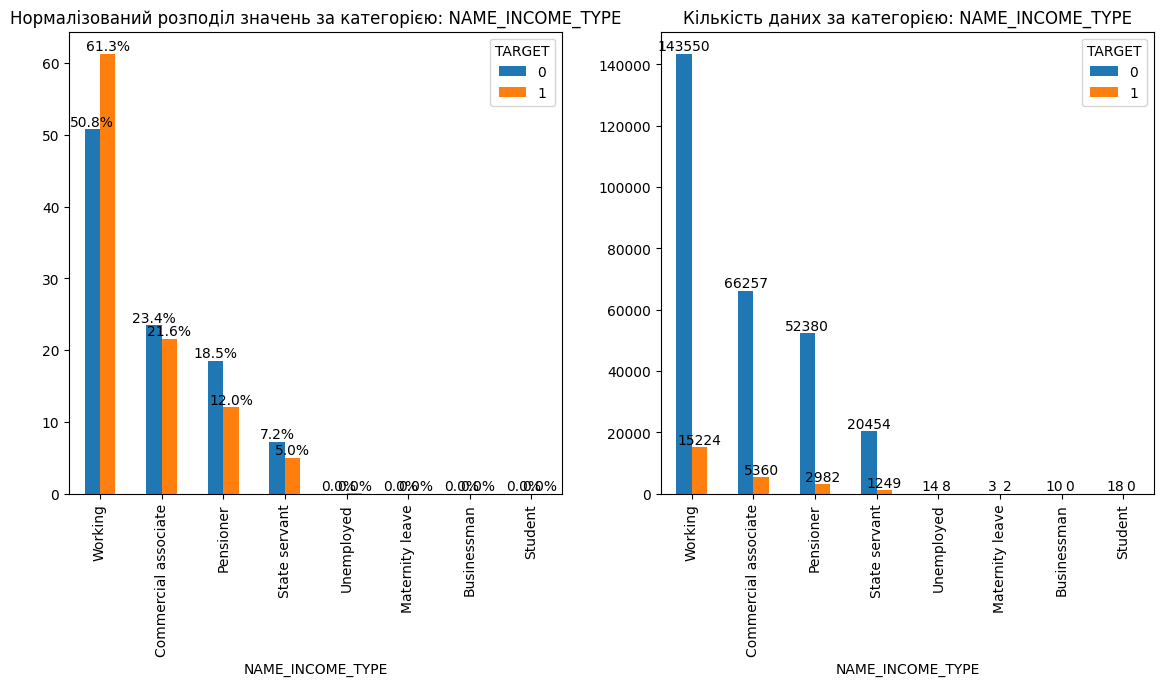

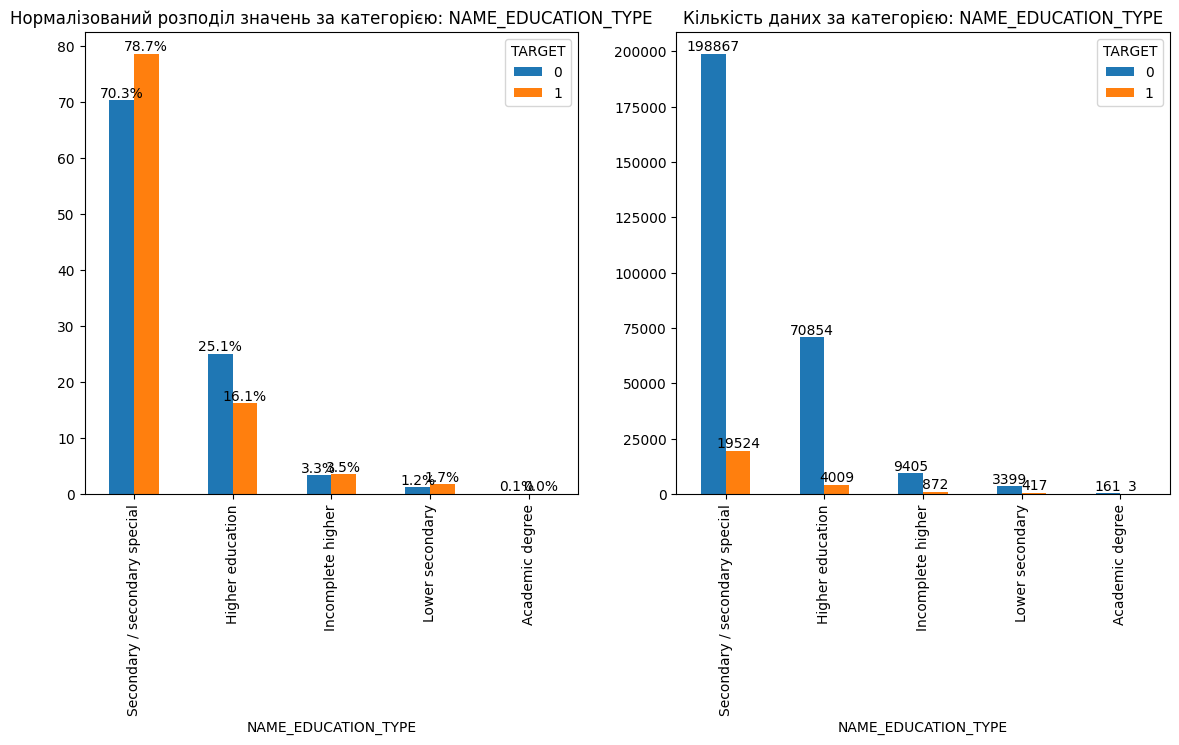

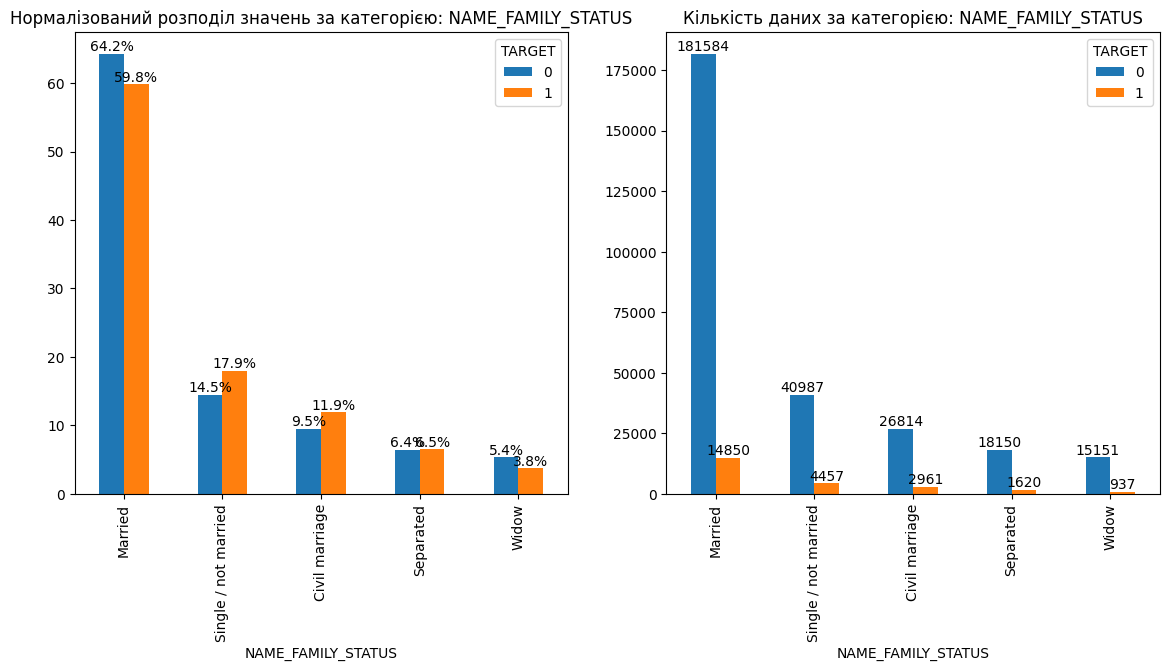

In [166]:
# Опціональний аналіз
print("\nАналіз стовпця: NAME_INCOME_TYPE")
uni_cat_target_compare(df, 'NAME_INCOME_TYPE')

print("\nАналіз стовпця: NAME_EDUCATION_TYPE")
uni_cat_target_compare(df, 'NAME_EDUCATION_TYPE')

print("\nАналіз стовпця: NAME_FAMILY_STATUS")
uni_cat_target_compare(df, 'NAME_FAMILY_STATUS')

**Загальний висновок:** На графіках бачимо що вони показують що змінні CODE_GENDER, FLAG_OWN_CAR, NAME_INCOME_TYPE та NAME_EDUCATION_TYPE мають вплив на цільову змінну TARGET. Вплив полягає в тому, що різні категорії цих змінних мають різну ймовірність бути в групі клієнтів, які мають труднощі з оплатою кредиту. Деякі категорії асоціюються з вищою ймовірністю труднощів (наприклад, чоловіки та люди без автомобіля, а також певні типи доходу та рівні освіти), тоді як інші - з нижчою. Цю інформацію можна використовувати при побудові моделі для прогнозування ймовірності дефолту.

# Кореляційний аналіз числових змінних

### Побудова кореляційної матриці для випадків із платіжними труднощами

In [167]:
# Розподіл даних на основі `TARGET`

### Створіть новий фрейм даних зі значенням `TARGET` 1
# - Значення `TARGET` 1 представляє клієнта з платіжними труднощами (він/вона прострочив платіж більш ніж на X днів принаймні по одному з перших Y платежів за кредитом). Це лише 8,07% даних

df1 = df[df['TARGET'] == 1]

# Перевірка заповнення значень згідно з очікуванням
df1.TARGET.value_counts()

### Створити новий фрейм даних зі значенням `TARGET` 0
# - Значення `TARGET` 0 представляє всі інші випадки, крім 1. Це 91.93% даних

df0 = df[df['TARGET'] == 0]

# Перевірка заповнення значень згідно з очікуванням
df0.TARGET.value_counts()

TARGET
0    282686
Name: count, dtype: int64

In [168]:
df1.select_dtypes(include=["int64","float64"]).shape

(24825, 111)

Є 66 числових стовпчиків. Створимо кореляційну матрицб `corr` для кращого перегляду результатів

In [169]:
corr_df1 = df1.select_dtypes(include=["int64","float64"]).corr()

In [170]:
corr_df1.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR              1.00     NaN         -0.01             -0.01   
TARGET                   NaN     NaN           NaN               NaN   
CNT_CHILDREN           -0.01     NaN          1.00              0.00   
AMT_INCOME_TOTAL       -0.01     NaN          0.00              1.00   
AMT_CREDIT             -0.00     NaN         -0.00              0.04   

                  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR             -0.00        -0.01            -0.00   
TARGET                   NaN          NaN              NaN   
CNT_CHILDREN           -0.00         0.03            -0.01   
AMT_INCOME_TOTAL        0.04         0.05             0.04   
AMT_CREDIT              1.00         0.75             0.98   

                  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
SK_ID_CURR                              0.01        0.00          -0.01   
TARGET                                   NaN         NaN            NaN   
CNT_CHILDREN                           -0.03       -0.26          -0.19   
AMT_INCOME_TOTAL                        0.01       -0.00          -0.01   
AMT_CREDIT                              0.07        0.14           0.00   

                  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
SK_ID_CURR                    -0.01             0.00        -0.01         NaN   
TARGET                          NaN              NaN          NaN         NaN   
CNT_CHILDREN                  -0.15             0.03         0.01         NaN   
AMT_INCOME_TOTAL              -0.00             0.00        -0.13         NaN   
AMT_CREDIT                     0.03             0.05        -0.07         NaN   

                  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
SK_ID_CURR                  0.01             0.00             -0.00   
TARGET                       NaN              NaN               NaN   
CNT_CHILDREN                0.19             0.05              0.00   
AMT_INCOME_TOTAL            0.01            -0.01             -0.00   
AMT_CREDIT                 -0.00            -0.06              0.03   

                  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
SK_ID_CURR              0.02        0.00            -0.00   
TARGET                   NaN         NaN              NaN   
CNT_CHILDREN           -0.02        0.01             0.89   
AMT_INCOME_TOTAL       -0.00        0.01             0.01   
AMT_CREDIT              0.01        0.01             0.05   

                  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
SK_ID_CURR                       -0.01                        -0.00   
TARGET                             NaN                          NaN   
CNT_CHILDREN                      0.04                         0.04   
AMT_INCOME_TOTAL                 -0.02                        -0.02   
AMT_CREDIT                       -0.06                        -0.07   

                  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
SK_ID_CURR                           0.01                       -0.00   
TARGET                                NaN                         NaN   
CNT_CHILDREN                        -0.02                       -0.02   
AMT_INCOME_TOTAL                     0.01                        0.01   
AMT_CREDIT                           0.03                        0.02   

                  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
SK_ID_CURR                              0.00                         0.00   
TARGET                                   NaN                          NaN   
CNT_CHILDREN                           -0.02                        -0.01   
AMT_INCOME_TOTAL                        0.01                         0.01   
AMT_CREDIT                              0.03                         0.03   

                  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
SK_ID_CURR                          0.01                    0.00   
TARGET         

Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

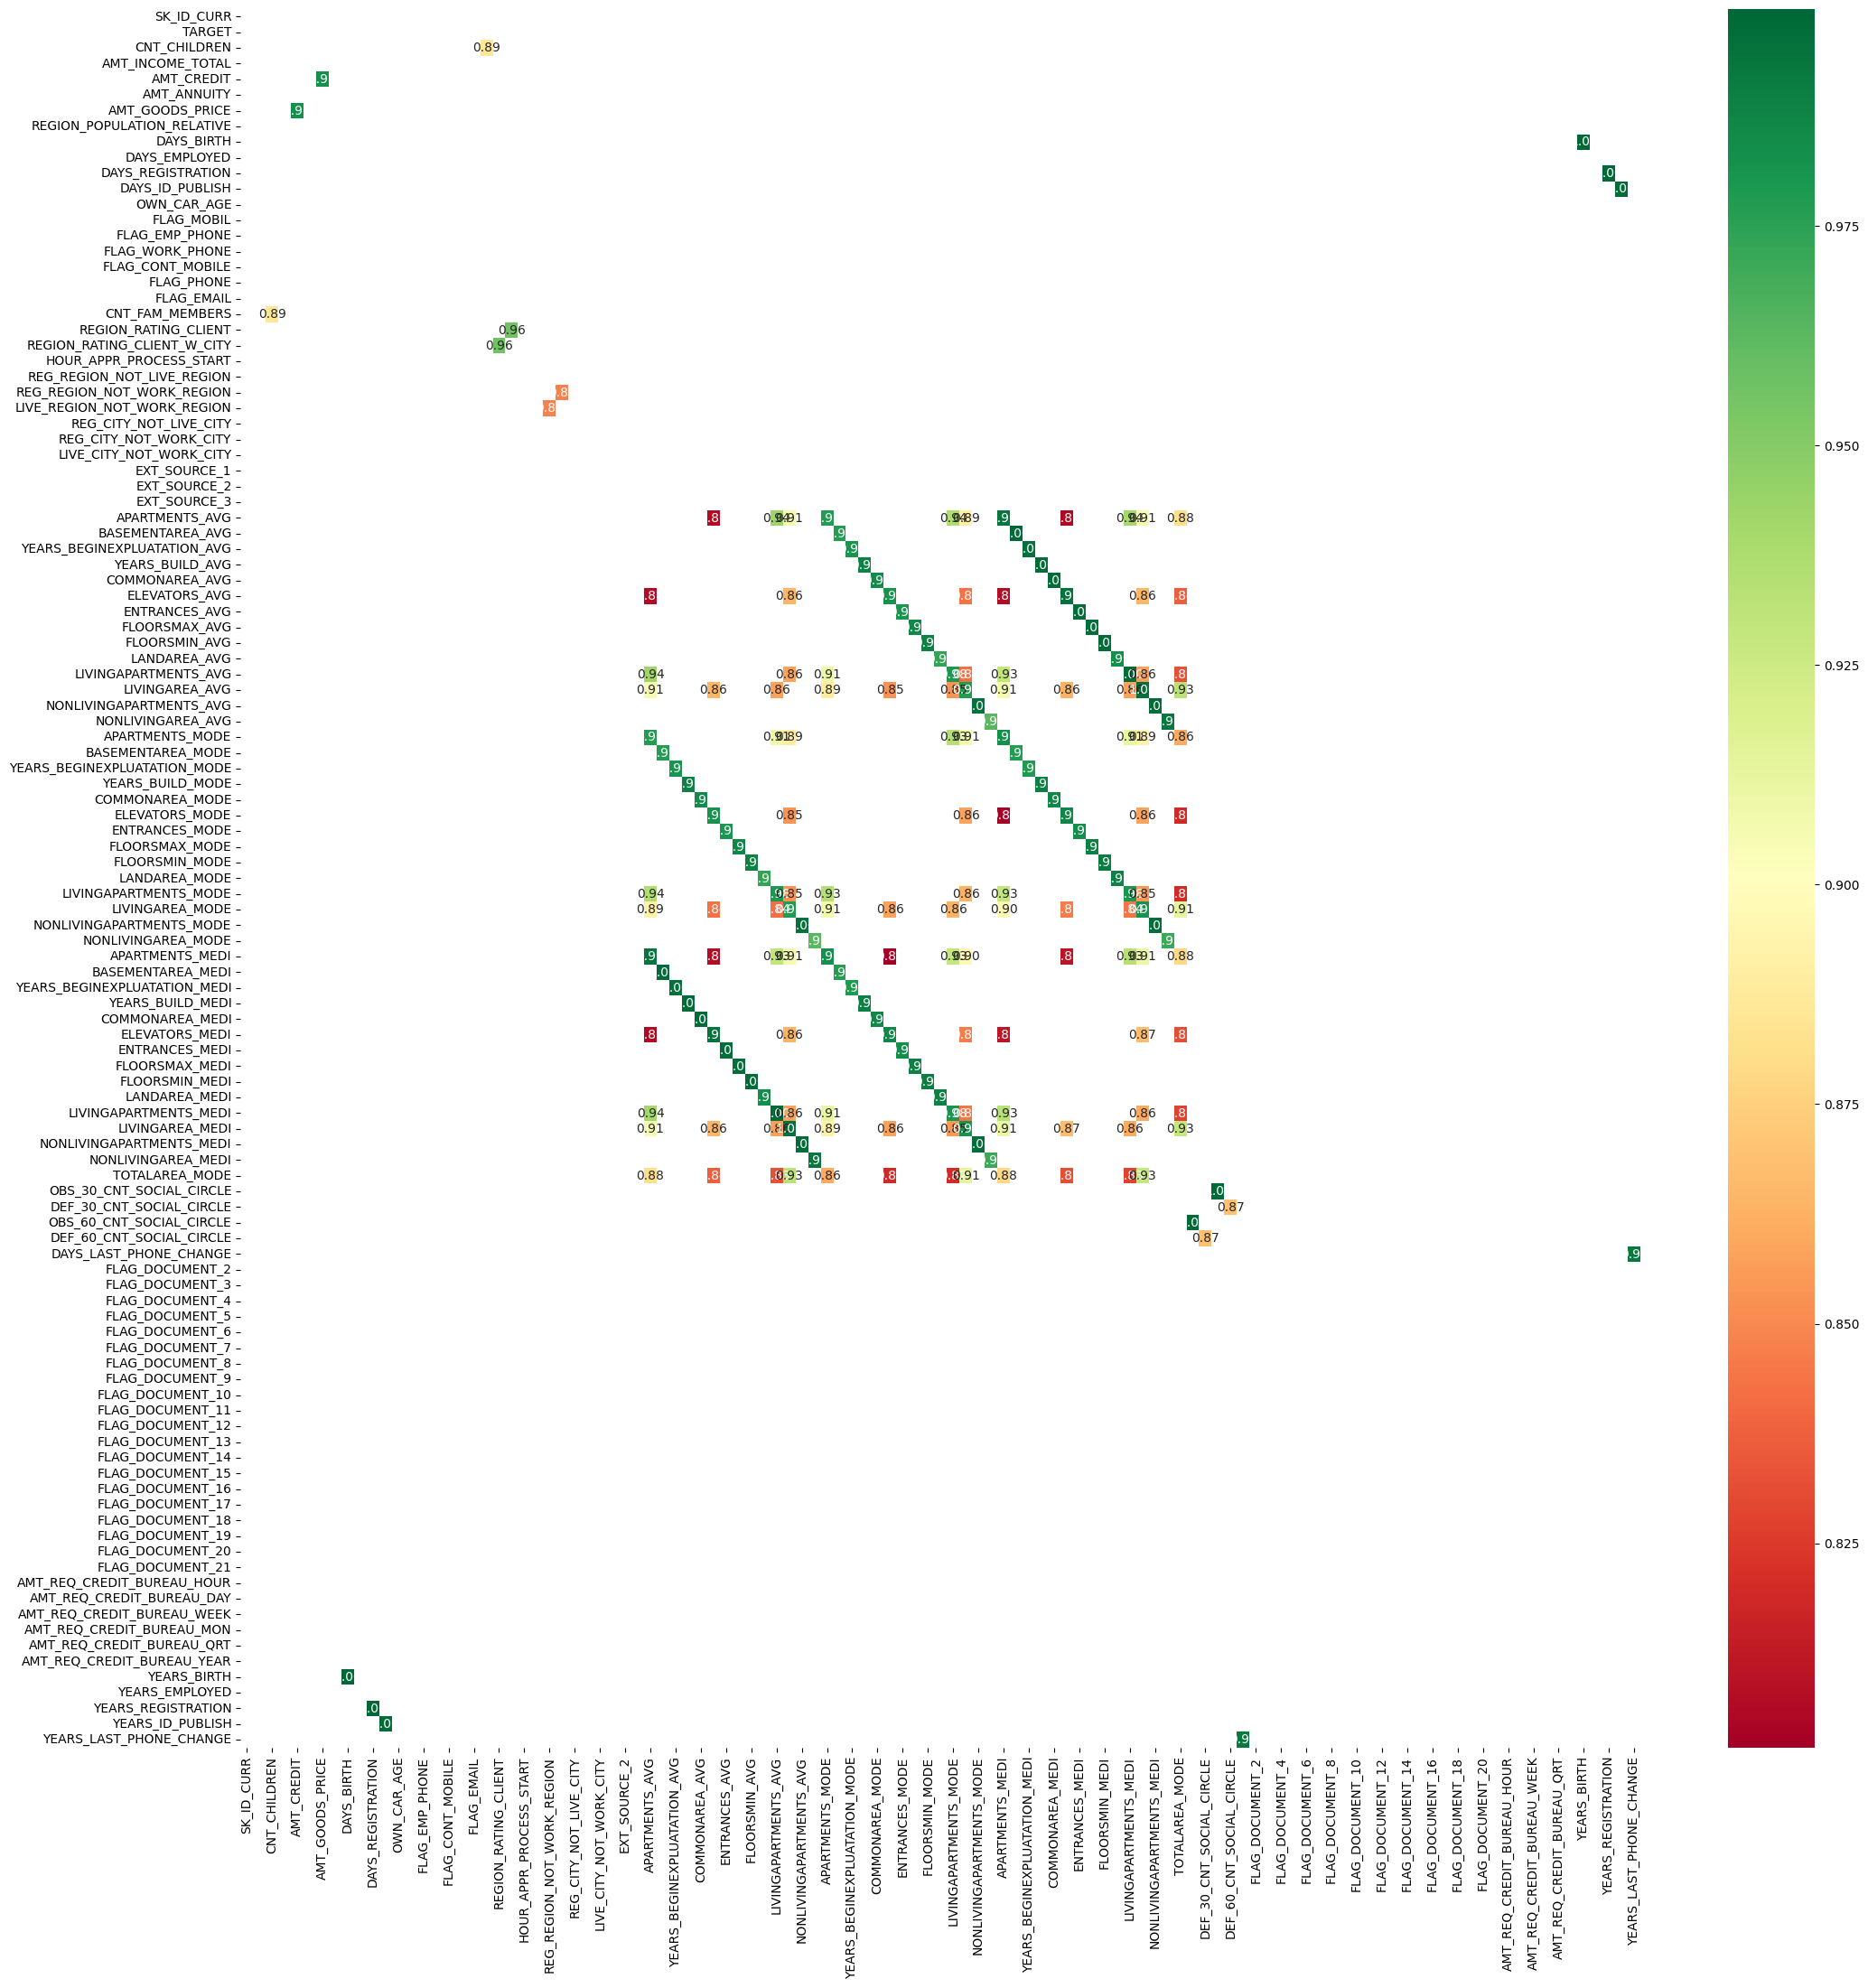

In [171]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1[(corr_df1 >= 0.8) & (corr_df1 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для випадків із платіжними труднощами

In [172]:
corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(22)

YEARS_BUILD_MODE  YEARS_BUILD_MEDI   0.99
YEARS_BUILD_MEDI  YEARS_BUILD_MODE   0.99
FLOORSMAX_MEDI    FLOORSMAX_MODE     0.99
FLOORSMAX_MODE    FLOORSMAX_MEDI     0.99
FLOORSMIN_MODE    FLOORSMIN_AVG      0.99
FLOORSMIN_AVG     FLOORSMIN_MODE     0.99
YEARS_BUILD_MODE  YEARS_BUILD_AVG    0.99
YEARS_BUILD_AVG   YEARS_BUILD_MODE   0.99
LANDAREA_MEDI     LANDAREA_MODE      0.99
LANDAREA_MODE     LANDAREA_MEDI      0.99
COMMONAREA_MEDI   COMMONAREA_MODE    0.99
COMMONAREA_MODE   COMMONAREA_MEDI    0.99
ELEVATORS_MEDI    ELEVATORS_MODE     0.99
ELEVATORS_MODE    ELEVATORS_MEDI     0.99
FLOORSMAX_AVG     FLOORSMAX_MODE     0.99
FLOORSMAX_MODE    FLOORSMAX_AVG      0.99
COMMONAREA_MODE   COMMONAREA_AVG     0.99
COMMONAREA_AVG    COMMONAREA_MODE    0.99
LANDAREA_AVG      LANDAREA_MEDI      0.98
LANDAREA_MEDI     LANDAREA_AVG       0.98
ENTRANCES_MODE    ENTRANCES_MEDI     0.98
ENTRANCES_MEDI    ENTRANCES_MODE     0.98
dtype: float64

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE -              AMT_CREDIT                    0.98
- REGION_RATING_CLIENT -         REGION_RATING_CLIENT_W_CITY   0.96
- CNT_FAM_MEMBERS -              CNT_CHILDREN                  0.89
- DEF_60_CNT_SOCIAL_CIRCLE -     DEF_30_CNT_SOCIAL_CIRCLE      0.87
- REG_REGION_NOT_WORK_REGION -   LIVE_REGION_NOT_WORK_REGION   0.85
- LIVE_CITY_NOT_WORK_CITY -      REG_CITY_NOT_WORK_CITY        0.78
- AMT_ANNUITY -                  AMT_GOODS_PRICE               0.75
- AMT_ANNUITY -                  AMT_CREDIT                    0.75
- DAYS_EMPLOYED -                FLAG_DOCUMENT_6               0.62
- DAYS_BIRTH -                   DAYS_EMPLOYED                 0.58

### Побудова кореляційної матриці для випадків із вчасними платежеми

In [173]:
df0.select_dtypes(include=["int64","float64"]).shape

(282686, 111)

Є 66 числових стовпчиків. Створимо кореляційну матрицю `corr` для кращого перегляду результатів

In [174]:
corr_df0 = df0.select_dtypes(include=["int64","float64"]).corr()

In [175]:
corr_df0.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR              1.00     NaN         -0.00              0.00   
TARGET                   NaN     NaN           NaN               NaN   
CNT_CHILDREN           -0.00     NaN          1.00              0.03   
AMT_INCOME_TOTAL        0.00     NaN          0.03              1.00   
AMT_CREDIT             -0.00     NaN          0.00              0.34   

                  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR             -0.00         0.00            -0.00   
TARGET                   NaN          NaN              NaN   
CNT_CHILDREN            0.00         0.02            -0.00   
AMT_INCOME_TOTAL        0.34         0.42             0.35   
AMT_CREDIT              1.00         0.77             0.99   

                  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
SK_ID_CURR                              0.00        0.00           0.00   
TARGET                                   NaN         NaN            NaN   
CNT_CHILDREN                           -0.02       -0.34          -0.25   
AMT_INCOME_TOTAL                        0.17       -0.06          -0.14   
AMT_CREDIT                              0.10        0.05          -0.07   

                  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
SK_ID_CURR                     0.00             0.00         0.00        0.00   
TARGET                          NaN              NaN          NaN         NaN   
CNT_CHILDREN                  -0.19             0.03         0.01        0.00   
AMT_INCOME_TOTAL              -0.06            -0.02        -0.12        0.00   
AMT_CREDIT                    -0.01             0.00        -0.09        0.00   

                  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
SK_ID_CURR                 -0.00            -0.00              0.00   
TARGET                       NaN              NaN               NaN   
CNT_CHILDREN                0.24             0.06             -0.00   
AMT_INCOME_TOTAL            0.14            -0.03             -0.02   
AMT_CREDIT                  0.07            -0.02              0.02   

                  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
SK_ID_CURR              0.00        0.00            -0.00   
TARGET                   NaN         NaN              NaN   
CNT_CHILDREN           -0.03        0.02             0.88   
AMT_INCOME_TOTAL        0.00        0.08             0.03   
AMT_CREDIT              0.03        0.02             0.06   

                  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
SK_ID_CURR                       -0.00                        -0.00   
TARGET                             NaN                          NaN   
CNT_CHILDREN                      0.02                         0.02   
AMT_INCOME_TOTAL                 -0.19                        -0.20   
AMT_CREDIT                       -0.10                        -0.11   

                  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
SK_ID_CURR                          -0.00                        0.00   
TARGET                                NaN                         NaN   
CNT_CHILDREN                        -0.01                       -0.01   
AMT_INCOME_TOTAL                     0.08                        0.07   
AMT_CREDIT                           0.05                        0.02   

                  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
SK_ID_CURR                              0.00                         0.00   
TARGET                                   NaN                          NaN   
CNT_CHILDREN                            0.01                         0.02   
AMT_INCOME_TOTAL                        0.14                         0.13   
AMT_CREDIT                              0.05                         0.05   

                  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
SK_ID_CURR                         -0.00                   -0.00   
TARGET         

Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

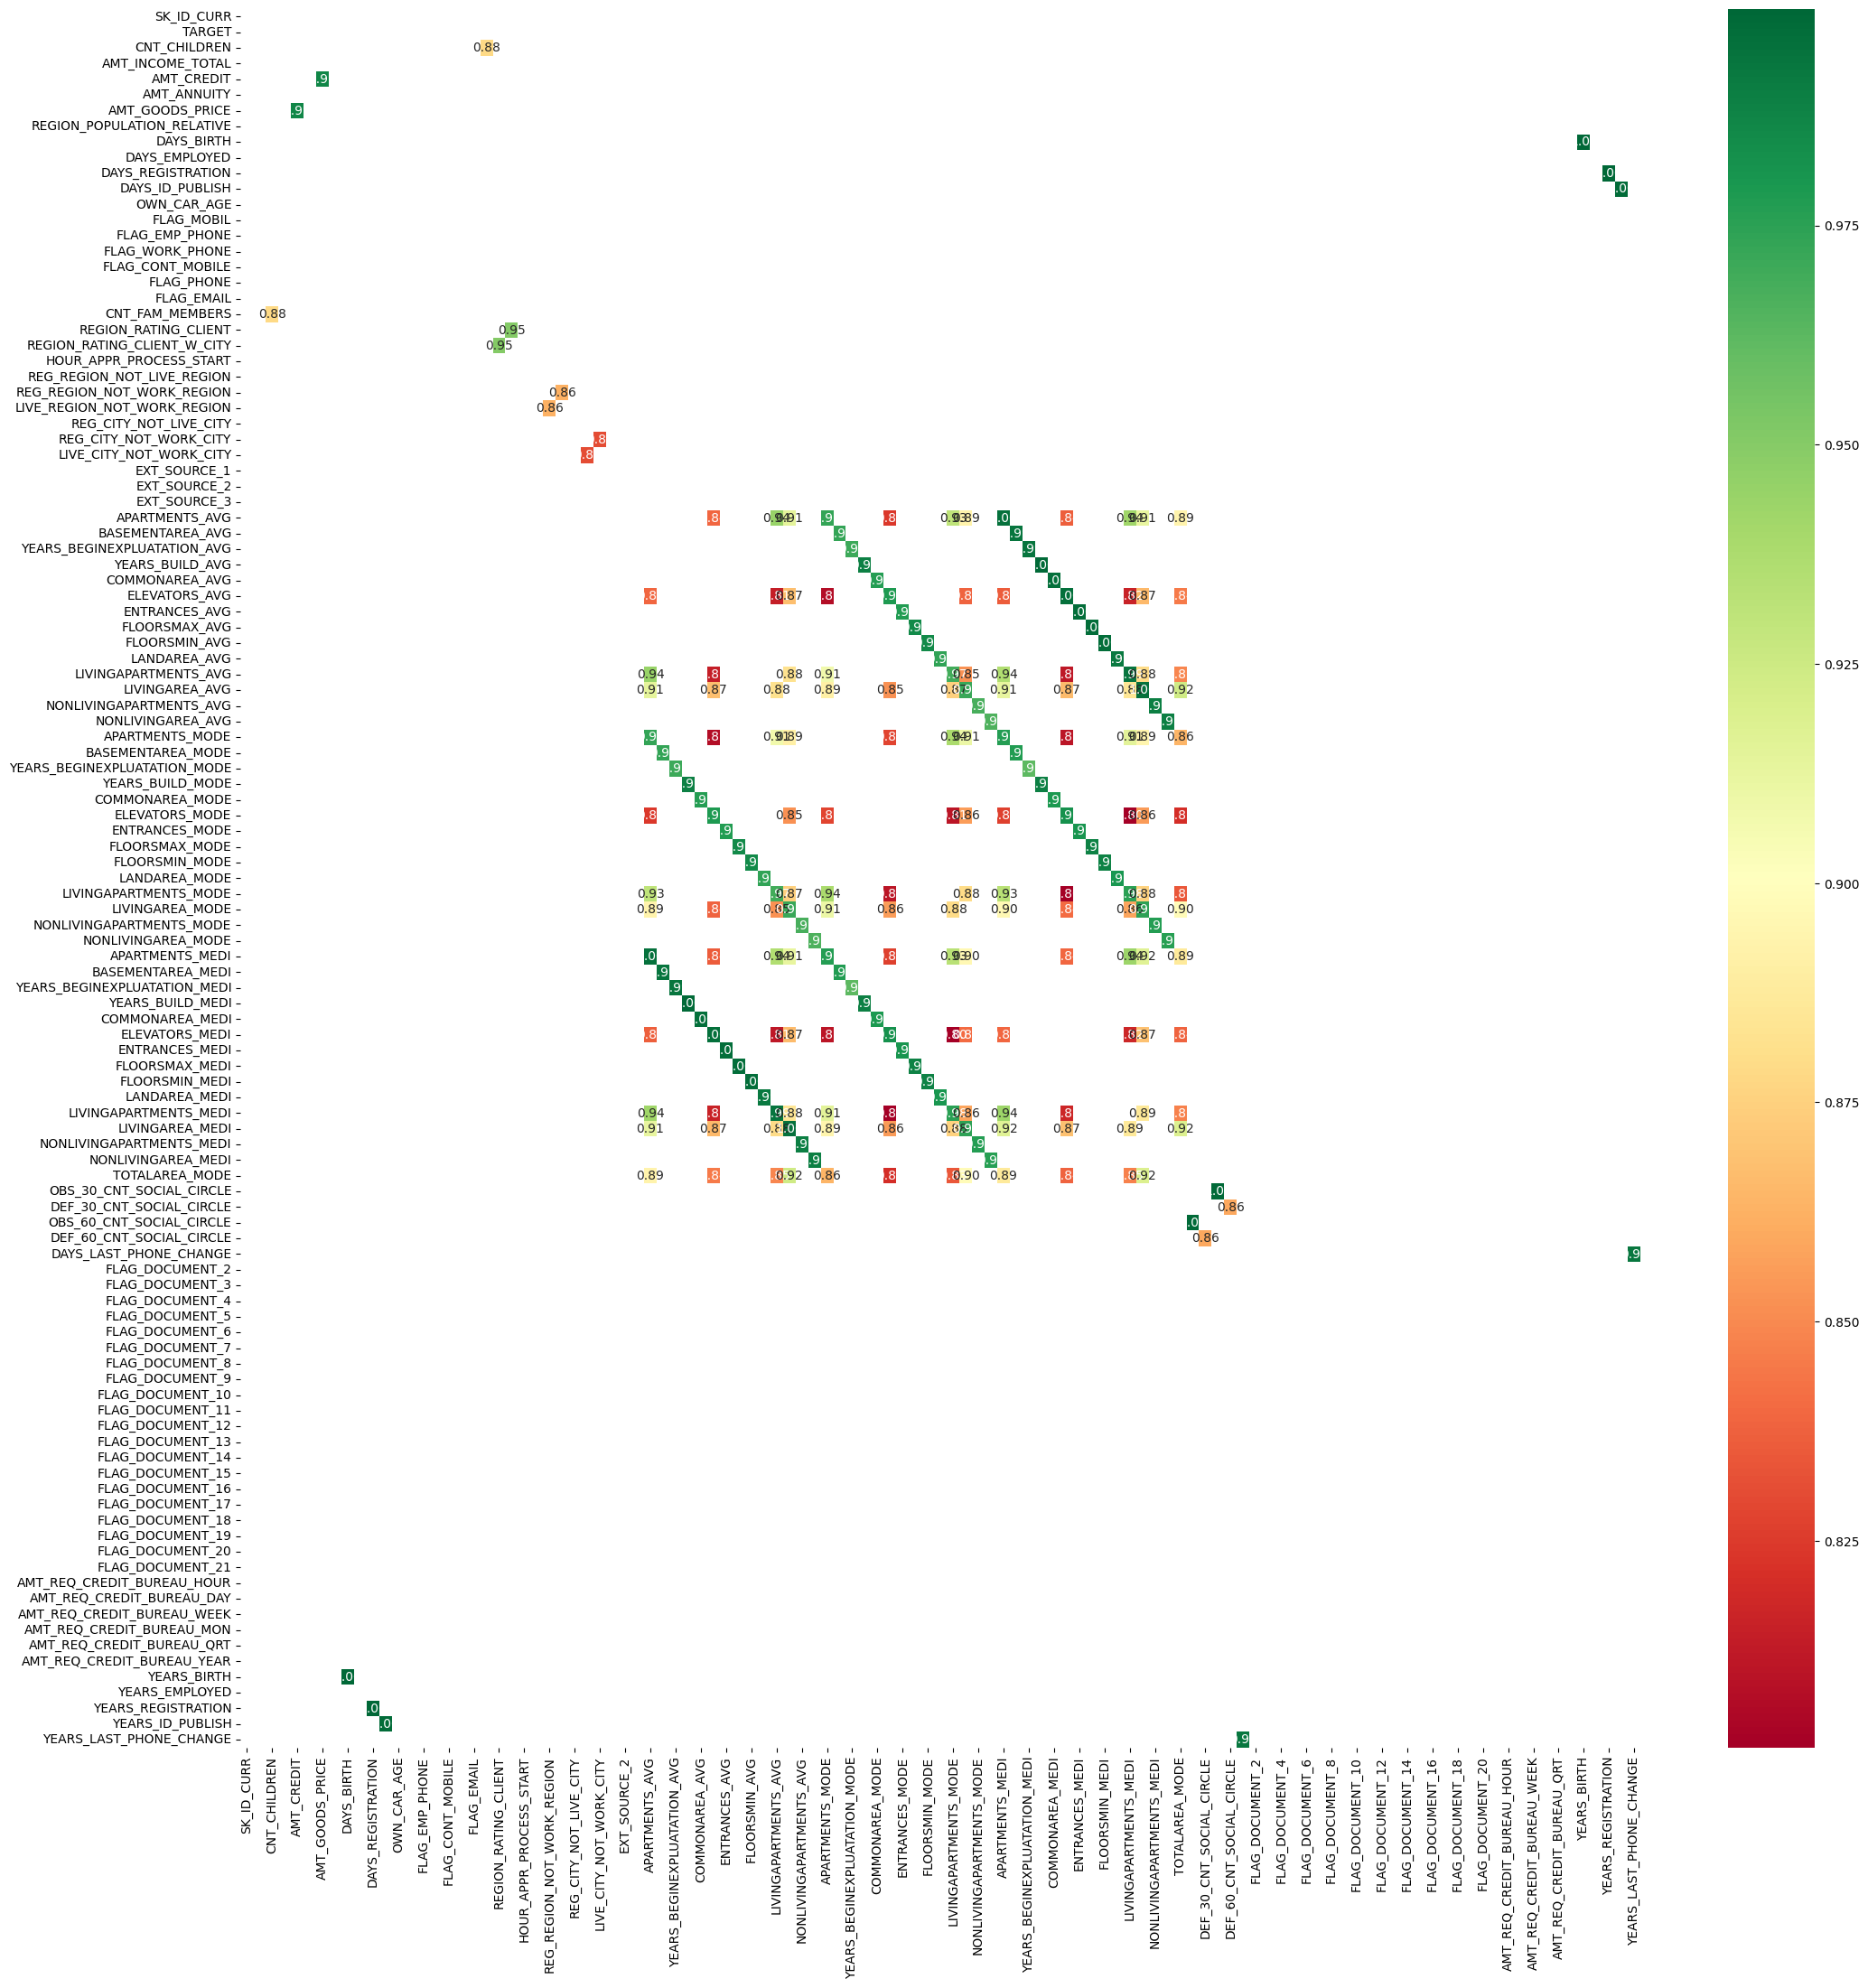

In [176]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df0[(corr_df0 >= 0.8) & (corr_df0 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для вчасних платежів

In [177]:
corr_df0[corr_df0 <= 0.99].unstack().sort_values(ascending = False).head(28)

YEARS_BUILD_AVG    YEARS_BUILD_MODE    0.99
YEARS_BUILD_MODE   YEARS_BUILD_AVG     0.99
                   YEARS_BUILD_MEDI    0.99
YEARS_BUILD_MEDI   YEARS_BUILD_MODE    0.99
FLOORSMIN_MODE     FLOORSMIN_MEDI      0.99
FLOORSMIN_MEDI     FLOORSMIN_MODE      0.99
FLOORSMAX_MODE     FLOORSMAX_MEDI      0.99
FLOORSMAX_MEDI     FLOORSMAX_MODE      0.99
AMT_CREDIT         AMT_GOODS_PRICE     0.99
AMT_GOODS_PRICE    AMT_CREDIT          0.99
FLOORSMIN_MODE     FLOORSMIN_AVG       0.99
FLOORSMIN_AVG      FLOORSMIN_MODE      0.99
FLOORSMAX_AVG      FLOORSMAX_MODE      0.99
FLOORSMAX_MODE     FLOORSMAX_AVG       0.99
ELEVATORS_MODE     ELEVATORS_MEDI      0.98
ELEVATORS_MEDI     ELEVATORS_MODE      0.98
ENTRANCES_MEDI     ENTRANCES_MODE      0.98
ENTRANCES_MODE     ENTRANCES_MEDI      0.98
LANDAREA_MEDI      LANDAREA_MODE       0.98
LANDAREA_MODE      LANDAREA_MEDI       0.98
COMMONAREA_MODE    COMMONAREA_MEDI     0.98
COMMONAREA_MEDI    COMMONAREA_MODE     0.98
ELEVATORS_AVG      ELEVATORS_MODE      0.98
ELEVATORS_MODE     ELEVATORS_AVG       0.98
BASEMENTAREA_MODE  BASEMENTAREA_MEDI   0.98
BASEMENTAREA_MEDI  BASEMENTAREA_MODE   0.98
ENTRANCES_MODE     ENTRANCES_AVG       0.98
ENTRANCES_AVG      ENTRANCES_MODE      0.98
dtype: float64

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE              AMT_CREDIT                    0.99
- REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
- CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
- REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
- DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
- LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
- AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
- AMT_ANNUITY                  AMT_CREDIT                    0.77
- DAYS_BIRTH                   DAYS_EMPLOYED                 0.63
- DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.60

### Порівняємо 10 найкращих кореляцій між випадками із платіжними труднощами та вчасними платежами

**Спостереження**

- Топ-10 кореляцій для Труднощів з оплатою та Вчасних платежів однакові, за винятком незначних відмінностей у відсотках кореляції
- Найвища кореляція для комбінації `AMT_GOODS_PRICE` та `AMT_CREDIT`.
- Для набору даних "Труднощі з оплатою" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,98
- Для набору даних "Вчасні платежі" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,99

# Одновимірний аналіз числових змінних

### Аналіз стовпця `AMT_CREDIT`

#### Пошук викидів в `AMT_CREDIT` при випадках із платіжними труднощами

Розрахунок IQR (Inter Quartile range)

In [178]:
Q1 = df1['AMT_CREDIT'].quantile(0.25)
Q3 = df1['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

448915.5


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [179]:
Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value1))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value1))

Мінімальне значення, до якого існують викиди: -388973.25
Максимальне значення, після якого існують викиди: 1406688.75


#### Пошук викидів в `AMT_CREDIT` при випадках із вчасними оплатами

Розрахунок IQR (Inter Quartile range)

In [180]:
Q1 = df0['AMT_CREDIT'].quantile(0.25)
Q3 = df0['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

540000.0


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [181]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -540000.0
Максимальне значення, після якого існують викиди: 1620000.0


Видалення викидів і побудова діаграми розподілу

In [182]:
def kde_no_outliers(df0, df1, Max_value0, Max_value1, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[df1[column] <= Max_value1][column],label = 'Payment difficulties')
  sns.kdeplot(df0[df0[column] <= Max_value0][column],label = 'On-Time Payments')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.legend()
  plt.show()

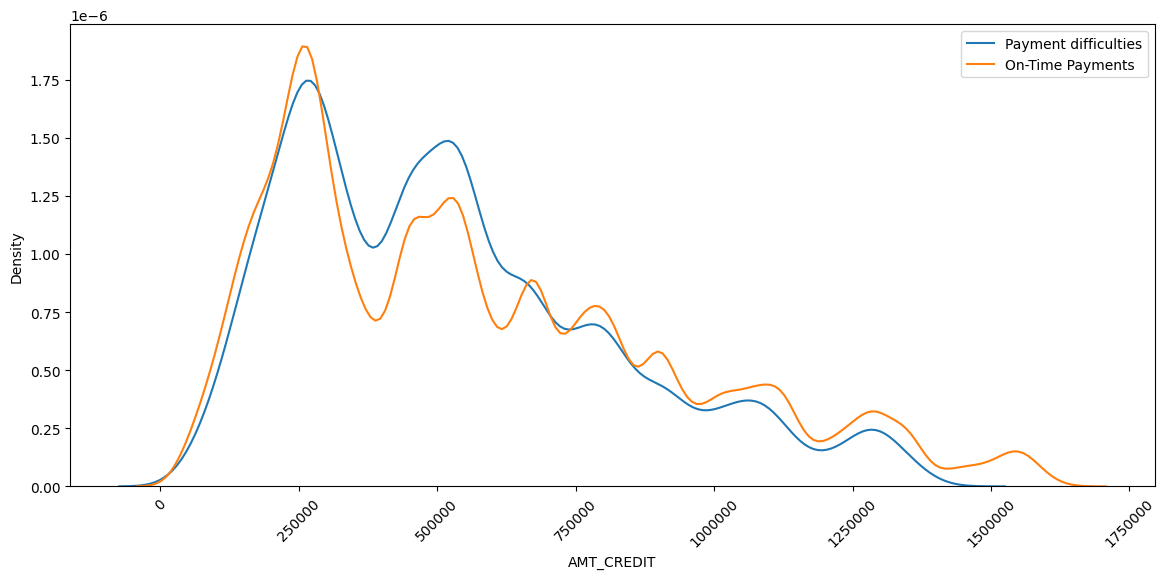

In [183]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'AMT_CREDIT')

**Спостереження**

- Для `AMT_CREDIT` від 250000 до приблизно 650000 більше клієнтів мають труднощі з оплатою
- Для `AMT_CREDIT` > 750000 більше клієнтів, які вчасно здійснюють платежі

# ДЗ 5. Одновимірний аналіз числової колонки

За наведеним вище прикладом, проведіть одновимірний аналіз (виявлення викидів, їх усунення та побудова KDE  графіку) для числових змінних
- `YEARS_BIRTH`
- `AMT_GOODS_PRICE`
- `DAYS_EMPLOYED`

Опціонально:
- `CNT_CHILDREN`
- `AMT_INCOME_TOTAL`

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.

Зробіть висновки з аналізу.

Крок 1: Створення функції для аналізу числових **змінних**

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

def analyze_and_plot_numerical(df, column, median_value=None):
    """
    Проводить одновимірний аналіз числової колонки, виявляє викиди
    та будує KDE графіки для обох цільових груп.

    Args:
        df (pd.DataFrame): Вхідний DataFrame.
        column (str): Ім'я числового стовпця для аналізу.
        median_value (float, optional): Медіанне значення для заповнення
                                        пропущених значень, якщо є. Defaults to None.
    """
    print(f"\n{'='*50}")
    print(f"Аналіз стовпця: {column}")
    print(f"{'='*50}")

    # 1. Відсоток пропущених значень
    percent_missing = df[column].isnull().mean() * 100
    print(f"Відсоток відсутніх значень: {percent_missing:.2f}%")

    # Заповнення пропущених значень, якщо вказано медіана
    if median_value is not None and percent_missing > 0:
         print(f"Заповнення пропущених значень медіаною ({median_value:.2f}).")
         df[column].fillna(median_value, inplace=True)


    # 2. Статистичний звіт
    print("\nСтатистичний звіт:")
    print(df[column].describe(percentiles = [0.25,0.75,0.99,0.999]))

    # 3. Виявлення викидів за допомогою IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f"\nIQR для {column}: {IQR:.2f}")

    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    print(f"Мінімальне значення, до якого існують викиди: {Min_value:.2f}")
    print(f"Максимальне значення, після якого існують викиди: {Max_value:.2f}")

    # 4. Побудова графіків розподілу (distplot) та боксплоту
    dist_box(df, column) # Використовуємо вже визначену функцію

    # Розділення даних на основі TARGET
    df0 = df[df['TARGET'] == 0].copy() # Вчасні платежі
    df1 = df[df['TARGET'] == 1].copy() # Труднощі з оплатою

    # Розрахунок Max_value для кожної групи окремо для більш точного KDE
    Q1_0 = df0[column].quantile(0.25)
    Q3_0 = df0[column].quantile(0.75)
    IQR_0 = Q3_0 - Q1_0
    Max_value0 = (Q3_0 + 1.5 * IQR_0)

    Q1_1 = df1[column].quantile(0.25)
    Q3_1 = df1[column].quantile(0.75)
    IQR_1 = Q3_1 - Q1_1
    Max_value1 = (Q3_1 + 1.5 * IQR_1)


    # 5. Побудова KDE графіку без викидів
    print(f"\nKDE графік для {column} без викидів:")
    plt.figure(figsize = (14,6))
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        sns.kdeplot(df1[df1[column] <= Max_value1][column], label = 'Payment difficulties')
        sns.kdeplot(df0[df0[column] <= Max_value0][column], label = 'On-Time Payments')
    plt.title(f'KDE для {column} (без викидів)')
    plt.ticklabel_format(style='plain', axis='x')
    plt.xticks(rotation = 45)
    plt.legend()
    plt.show()

Крок 2: Виклик функції для кожної пари змінних[текст посилання](https://)


Аналіз стовпця: YEARS_BIRTH
Відсоток відсутніх значень: 0.00%

Статистичний звіт:
count   307511.00
mean        43.94
std         11.96
min         21.00
25%         34.00
50%         43.00
75%         54.00
99%         67.00
99.9%       69.00
max         69.00
Name: YEARS_BIRTH, dtype: float64

IQR для YEARS_BIRTH: 20.00
Мінімальне значення, до якого існують викиди: 4.00
Максимальне значення, після якого існують викиди: 84.00


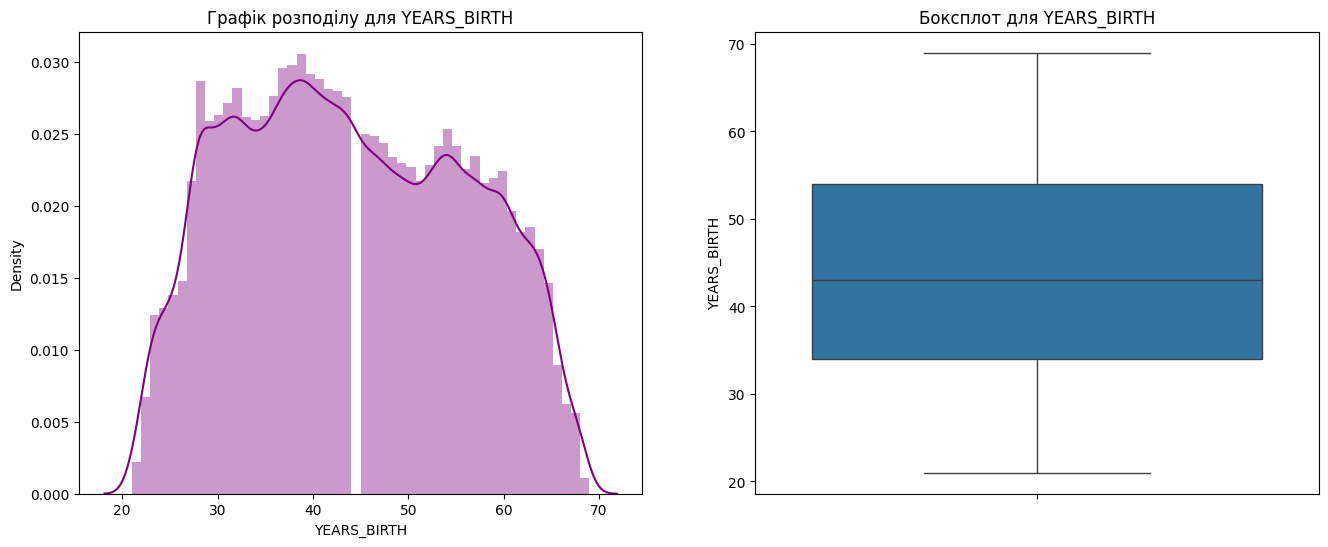


KDE графік для YEARS_BIRTH без викидів:


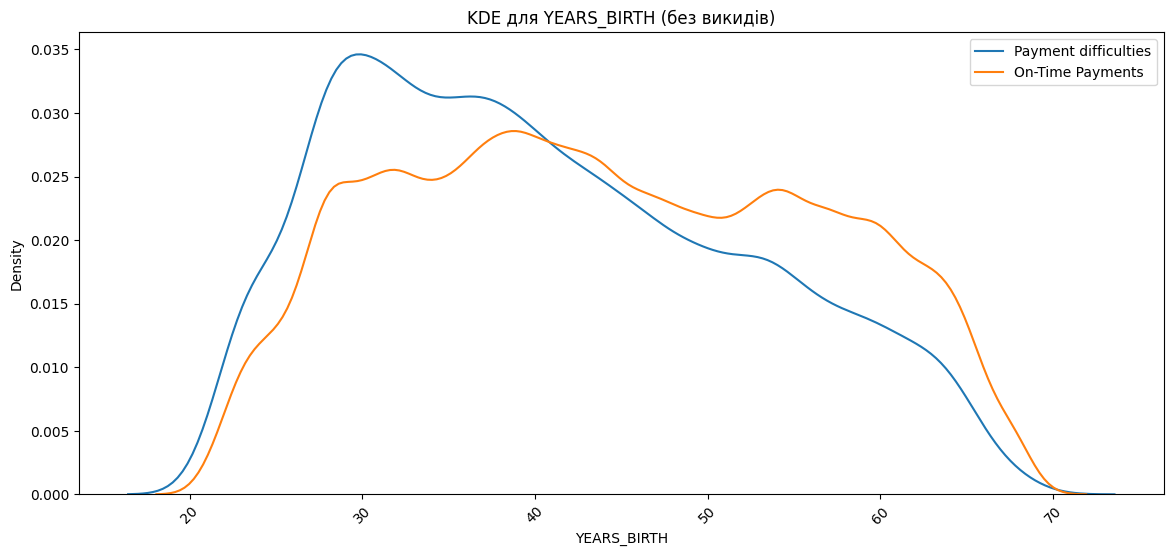


Аналіз стовпця: AMT_GOODS_PRICE
Відсоток відсутніх значень: 0.09%

Статистичний звіт:
count    307233.00
mean     538396.21
std      369446.46
min       40500.00
25%      238500.00
50%      450000.00
75%      679500.00
99%     1800000.00
99.9%   2250000.00
max     4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

IQR для AMT_GOODS_PRICE: 441000.00
Мінімальне значення, до якого існують викиди: -423000.00
Максимальне значення, після якого існують викиди: 1341000.00


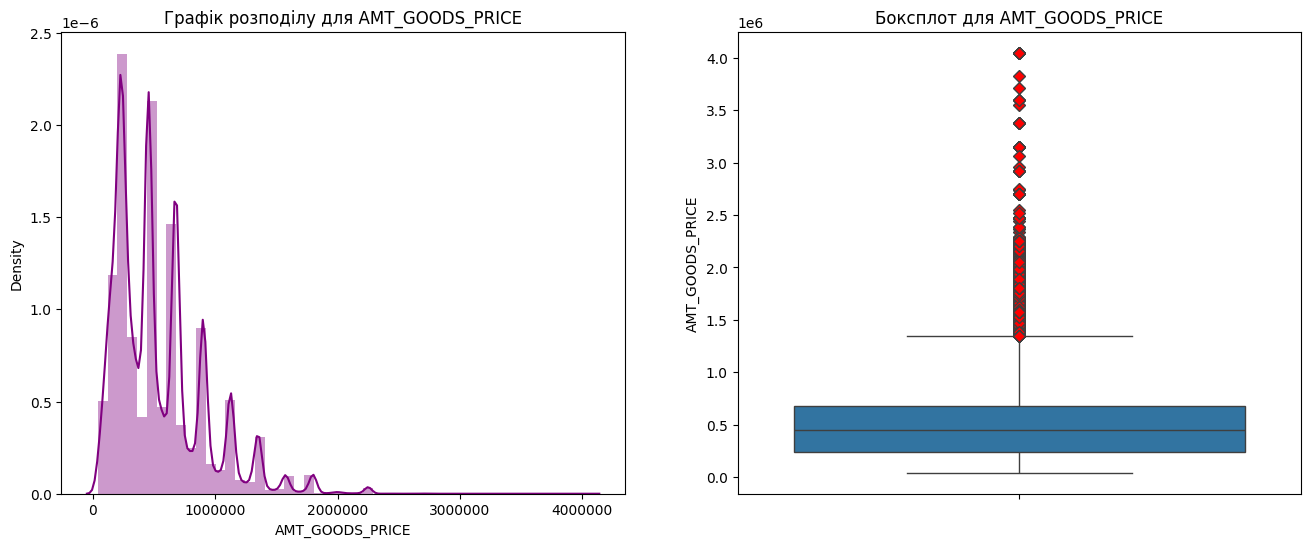


KDE графік для AMT_GOODS_PRICE без викидів:


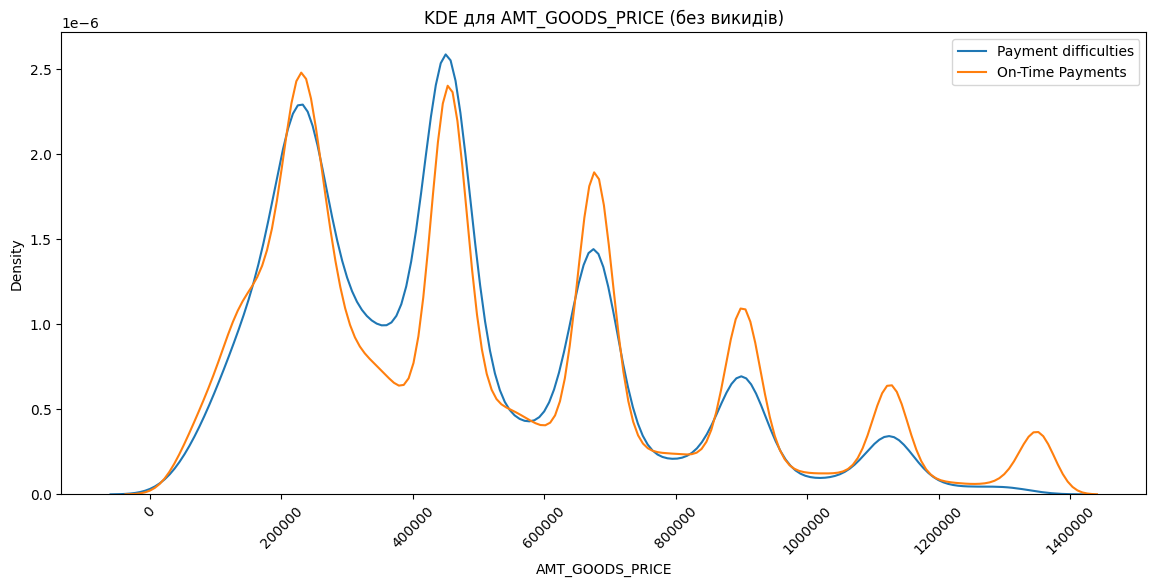


Аналіз стовпця: DAYS_EMPLOYED
Відсоток відсутніх значень: 0.00%

Статистичний звіт:
count   307511.00
mean     67724.74
std     139443.75
min          0.00
25%        933.00
50%       2219.00
75%       5707.00
99%     365243.00
99.9%   365243.00
max     365243.00
Name: DAYS_EMPLOYED, dtype: float64

IQR для DAYS_EMPLOYED: 4774.00
Мінімальне значення, до якого існують викиди: -6228.00
Максимальне значення, після якого існують викиди: 12868.00


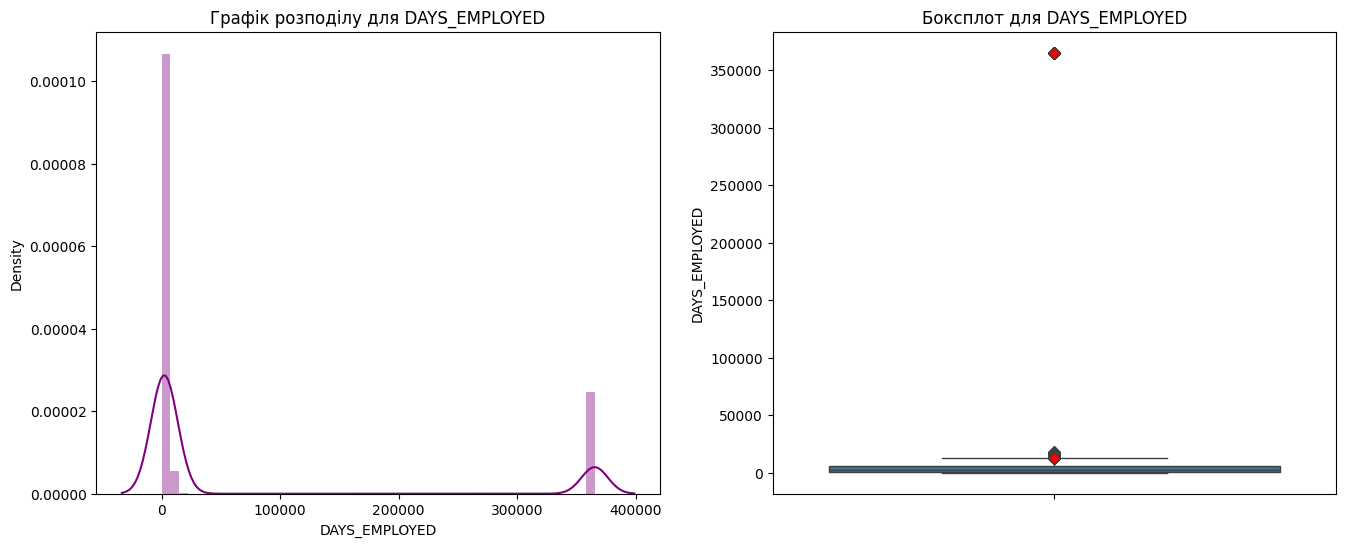


KDE графік для DAYS_EMPLOYED без викидів:


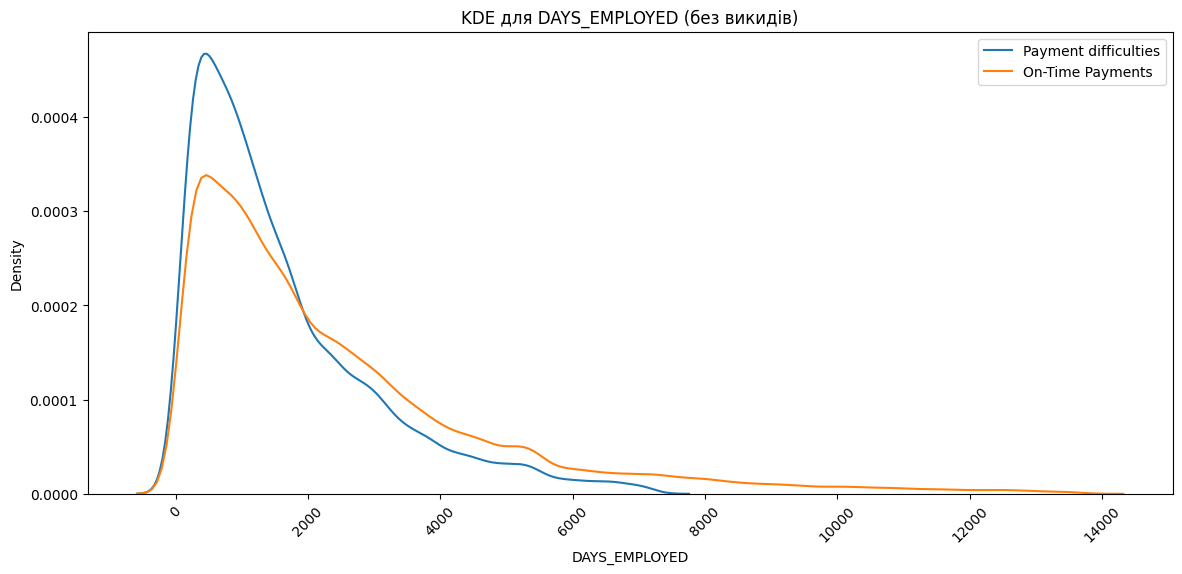

In [185]:
# Завантаження даних (якщо ще не завантажено)
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning для людей - Лекційний ноутбук Дослідницького аналізу даних/application_data.csv')

# Виклик функції для YEARS_BIRTH
analyze_and_plot_numerical(df, 'YEARS_BIRTH')

# Виклик функції для AMT_GOODS_PRICE
analyze_and_plot_numerical(df, 'AMT_GOODS_PRICE')

# Виклик функції для DAYS_EMPLOYED
analyze_and_plot_numerical(df, 'DAYS_EMPLOYED')

# Опціонально: Виклик функції для CNT_CHILDREN
# analyze_and_plot_numerical(df, 'CNT_CHILDREN')

# Опціонально: Виклик функції для AMT_INCOME_TOTAL
# analyze_and_plot_numerical(df, 'AMT_INCOME_TOTAL')

**Загальний висновок з аналізу числових змінних:**

Проведений одновимірний аналіз числових змінних (YEARS_BIRTH, AMT_GOODS_PRICE, DAYS_EMPLOYED) дозволив зробити наступні ключові спостереження:

Якість даних та викиди:

Змінна AMT_GOODS_PRICE мала незначний відсоток пропущених значень (0.09%), тоді як YEARS_BIRTH та DAYS_EMPLOYED були заповнені повністю.

Усі проаналізовані змінні містять викиди, що було виявлено за допомогою методу міжквартильного розмаху (IQR). Особливо значна кількість викидів або специфічних значень спостерігається у DAYS_EMPLOYED (значення 365243, що, ймовірно, вказує на безробітних або пенсіонерів і потребує окремої обробки). Візуалізація розподілів без урахування цих екстремальних значень дозволяє краще зрозуміти основні тенденції.

Характеристики розподілів:

YEARS_BIRTH (вік клієнтів) має розподіл, близький до нормального, з невеликою асиметрією.

AMT_GOODS_PRICE (вартість товару) демонструє правосторонню асиметрію, що вказує на переважну кількість кредитів на менші суми, але з наявністю кредитів на значно дорожчі товари.

DAYS_EMPLOYED (тривалість роботи в днях) має дуже специфічний розподіл через велику кількість значень 365243. Основна частина даних для працевлаштованих клієнтів також має правосторонню асиметрію.

Зв'язок з цільовою змінною (TARGET):

YEARS_BIRTH: Спостерігається різниця у розподілі віку для двох груп. Клієнти, які мають труднощі з оплатою (TARGET=1), в середньому дещо молодші, ніж клієнти, які вчасно сплачують кредити (TARGET=0).

AMT_GOODS_PRICE: Після видалення викидів, розподіли вартості товару для обох цільових груп стають досить схожими. Хоча є незначна тенденція, що клієнти з труднощами в оплаті частіше беруть кредити на товари з трохи меншою вартістю, ця змінна, ймовірно, має меншу розділювальну здатність порівняно з іншими.

DAYS_EMPLOYED: Ця змінна показує помітну різницю. Клієнти з труднощами в оплаті (TARGET=1) частіше мають менший стаж роботи (менше значення DAYS_EMPLOYED, не враховуючи аномальне значення 365243) порівняно з тими, хто платить вчасно (TARGET=0). Це вказує на те, що тривалість та стабільність роботи є важливим фактором платоспроможності.

Загалом, аналіз підтверджує, що вік клієнта та тривалість його роботи є потенційно важливими предикторами для визначення ризику неповернення кредиту. Вартість товару, після очищення від викидів, показує менш виражений зв'язок. Особливу увагу при подальшому моделюванні слід приділити обробці специфічних значень у змінній DAYS_EMPLOYED.

# Двовимірний/Багатовимірний аналіз

## Неперервні vs неперервні змінні

### Аналіз стовпця `AMT_GOODS_PRICE` vs `AMT_CREDIT`

**Пошук викидів для ствопця `AMT_GOODS_PRICE ` для групи із платіжними труднощами**

In [191]:
max_value1_AMT_GOODS_PRICE = outlier_range(df1,'AMT_GOODS_PRICE')
max_value1_AMT_GOODS_PRICE

np.float64(1329750.0)

**Пошук викидів для ствопця `AMT_CREDIT` для групи із платіжними труднощами**

In [192]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

np.float64(1406688.75)

**Пошук викидів для `AMT_GOODS_PRICE `для групи із вчасними оплатами**

In [193]:
max_value0_AMT_GOODS_PRICE = outlier_range(df0,'AMT_GOODS_PRICE')
max_value0_AMT_GOODS_PRICE

np.float64(1363500.0)

**Пошук викидів для `AMT_CREDIT `для групи із вчасними оплатами**

In [194]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

np.float64(1620000.0)

Побудова діаграми розсіювання для порівняння з видаленими викидами

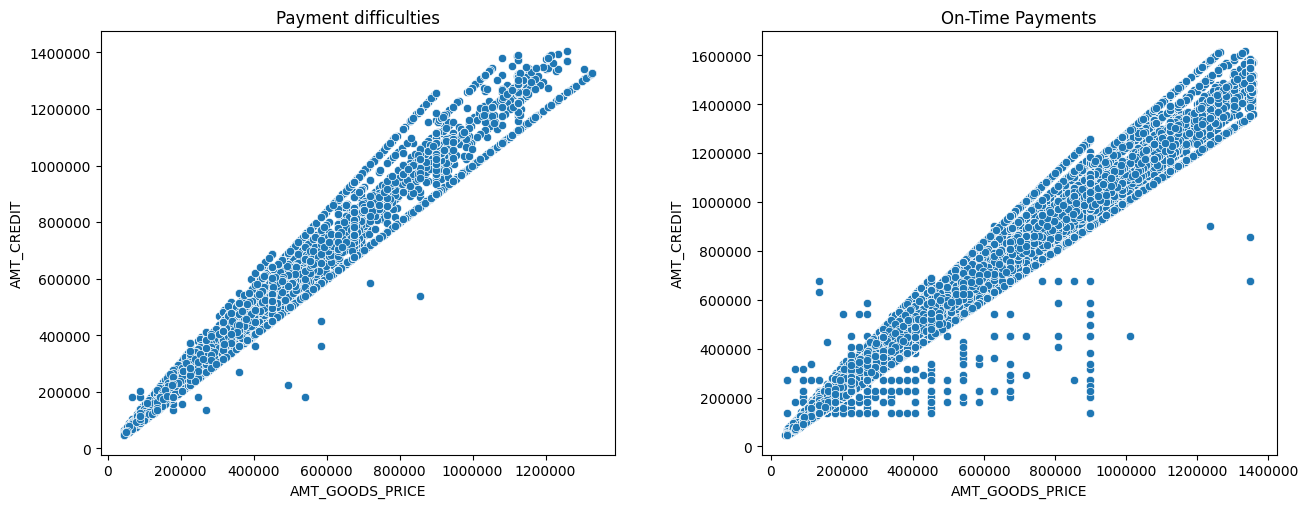

In [195]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

**Спостереження**
- AMT_GOODS_PRICE та AMT_CREDIT мають сильну позитивну кореляцію. Це означає, що зі збільшенням ціни товару зростає і сума кредиту

# ДЗ 6. Кореляційний аналіз для пари числових змінних

За наведеним вище прикладом, проведіть кореляційний аналіз для пар змінних
- AMT_ANNUITY і AMT_CREDIT

Опціонально:
- DAYS_EMPLOYED і AMT_INCOME_TOTAL
- AMT_CREDIT і DAYS_BIRTH

[Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.](https://)
Зробіть висновок про наявність кореляції між змінними.

# Крок 1: Створення функції для кореляційного аналізу

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_correlation(df, col1, col2):
    """
    Проводить кореляційний аналіз між двома числовими стовпцями.

    Args:
        df (pd.DataFrame): Вхідний DataFrame.
        col1 (str): Ім'я першого числового стовпця.
        col2 (str): Ім'я другого числового стовпця.
    """
    print(f"\n{'='*50}")
    print(f"Кореляційний аналіз між: {col1} та {col2}")
    print(f"{'='*50}")

    # Кореляція для всього набору даних
    correlation_all = df[col1].corr(df[col2])
    print(f"Кореляція для всього набору даних: {correlation_all:.2f}")

    # Розділення даних за TARGET
    df0 = df[df['TARGET'] == 0].copy()
    df1 = df[df['TARGET'] == 1].copy()

    # Кореляція для TARGET=0 (вчасно)
    if not df0[[col1, col2]].isnull().all().any(): # Перевірка на наявність не-NaN значень
      correlation_0 = df0[col1].corr(df0[col2])
      print(f"Кореляція для TARGET=0 (Вчасно): {correlation_0:.2f}")
    else:
      print(f"Недостатньо даних для TARGET=0 ({col1} або {col2} містить лише NaN)")


    # Кореляція для TARGET=1 (з труднощами)
    if not df1[[col1, col2]].isnull().all().any(): # Перевірка на наявність не-NaN значень
      correlation_1 = df1[col1].corr(df1[col2])
      print(f"Кореляція для TARGET=1 (Труднощі): {correlation_1:.2f}")
    else:
        print(f"Недостатньо даних для TARGET=1 ({col1} або {col2} містить лише NaN)")


    # Побудова точкової діаграми
    print("\nТочкова діаграма:")
    plt.figure(figsize=(14, 6))
    sns.scatterplot(data=df, x=col1, y=col2, hue='TARGET', alpha=0.5)
    plt.title(f'Зв\'язок між {col1} та {col2} за TARGET')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.ticklabel_format(style='plain', axis='both')
    plt.show()

Крок 2: Виклик функції для кожної пари *змінних*


Кореляційний аналіз між: AMT_ANNUITY та AMT_CREDIT
Кореляція для всього набору даних: 0.77
Кореляція для TARGET=0 (Вчасно): 0.77
Кореляція для TARGET=1 (Труднощі): 0.75

Точкова діаграма:


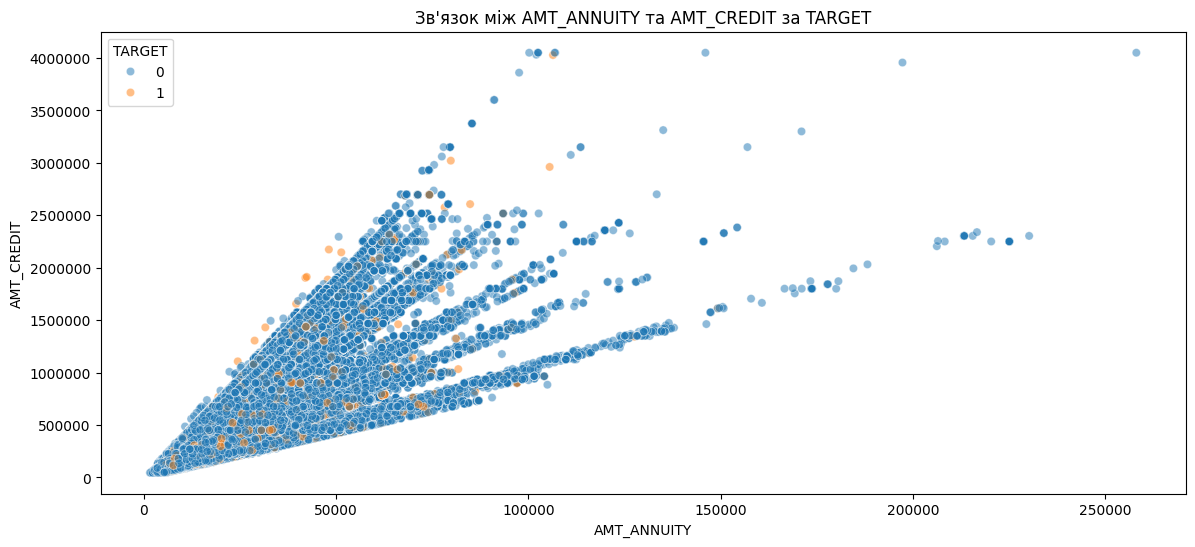

In [197]:
# Завантаження даних (якщо ще не завантажено)
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning для людей - Лекційний ноутбук Дослідницького аналізу даних/application_data.csv')

# Виклик функції для AMT_ANNUITY і AMT_CREDIT
analyze_correlation(df, 'AMT_ANNUITY', 'AMT_CREDIT')

# Опціонально: Виклик функції для DAYS_EMPLOYED і AMT_INCOME_TOTAL
# analyze_correlation(df, 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL')

# Опціонально: Виклик функції для AMT_CREDIT і DAYS_BIRTH
# analyze_correlation(df, 'AMT_CREDIT', 'DAYS_BIRTH')

**Висновок:**

Встановлено сильну позитивну кореляцію (близько 0.77) між щорічним платежем (AMT_ANNUITY) та загальною сумою кредиту (AMT_CREDIT), яка є стабільною як для всього набору даних, так і для груп клієнтів, щовчасно сплачують кредити (TARGET=0, кореляція 0.77) та тих, хто має труднощі (TARGET=1, кореляція 0.75). Ваш скрипт також призначений для аналогічного дослідження кореляційних зв'язків для пар DAYS_EMPLOYED (стаж роботи) з AMT_INCOME_TOTAL (загальний дохід) та AMT_CREDIT з DAYS_BIRTH (вік клієнта), розраховуючи коефіцієнти для загальної вибірки та окремо за значеннями TARGET, і супроводжуючи це візуалізацією через точкові діаграми. Такий підхід дозволить кількісно оцінити та наочно побачити лінійні залежності між цими ключовими змінними, проте важливо пам'ятати, що виявлена кореляція не автоматично вказує на причинно-наслідковий зв'язок.


## Неперервні та категоріальні змінні

In [199]:
def draw_boxplot(df, categorical, continuous, max_continuous, title, hue_column, subplot_position):
    """
    Малює блок-діаграму для заданого DataFrame, категоріальної та неперервної змінної.
    """
    plt.subplot(1, 2, subplot_position)
    plt.title(title)
    red_diamond = dict(markerfacecolor='r', marker='D')
    sns.boxplot(x=categorical,
                y=df[df[continuous] < max_continuous][continuous],
                data=df,
                flierprops=red_diamond,
                order=sorted(df[categorical].unique(), reverse=True),
                hue=hue_column, hue_order=sorted(df[hue_column].unique(), reverse=True))
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)

def bi_boxplot(categorical, continuous, max_continuous1, max_continuous0, hue_column):
    """
    Створює паралельні блок-діаграми для двох груп, визначених у наборі даних, на основі
    категоріальної та неперервної змінної, виділяючи відмінності за допомогою відтінків.
    """
    plt.figure(figsize=(16, 10))

    # Графік для першо групи "Труднощі з платежами" (Payment Difficulties)
    draw_boxplot(df1, categorical, continuous, max_continuous1, 'Payment Difficulties', hue_column, 1)

    # Графік для другої групи "Вчасні оплати" (On-Time Payments)
    draw_boxplot(df0, categorical, continuous, max_continuous0, 'On-Time Payments', hue_column, 2)

    plt.tight_layout(pad=4)
    plt.show()

### Аналіз стовпців `AMT_CREDIT` vs `NAME_EDUCATION_TYPE` vs `CODE_GENDER`

**Пошук викидів для `AMT_CREDIT `для групи із платіжними труднощами**

In [200]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

np.float64(1406688.75)

**Пошук викидів для `AMT_CREDIT ` для групи із вчасними платежами**

In [201]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

np.float64(1620000.0)

**Клієнт з платіжними труднощами**

In [202]:
df1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                         
Academic degree     F              3.00 950245.50 504711.38 544491.00   
Higher education    F           2438.00 648500.58 410415.70  47970.00   
                    M           1571.00 642070.94 409695.93  45000.00   
Incomplete higher   F            504.00 520150.35 352227.49  91692.00   
                    M            368.00 554723.82 347843.71  74628.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           667660.50 790830.00 1153122.75 1515415.50  
Higher education    F           323595.00 545040.00  877500.00 2687355.00  
                    M           329202.00 545040.00  832797.00 2695500.00  
Incomplete higher   F           269550.00 450000.00  675000.00 2695500.00  
                    M           284400.00 497520.00  699976.12 2013840.00

**Клієнт зі вчасними платежами**

In [203]:
df0.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                          
Academic degree     F              97.00 708770.74 463052.42 130824.00   
                    M              64.00 735235.38 497739.97  74182.50   
Higher education    F           47852.00 682485.00 456642.78  45000.00   
                    M           23002.00 713144.54 486073.66  45000.00   
Incomplete higher   F            5780.00 555340.53 385980.60  45000.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           354469.50 607500.00 1006920.00 2463840.00  
                    M           309519.00 610056.00 1036890.00 1984500.00  
Higher education    F           302206.50 568057.50  916470.00 4050000.00  
                    M           315000.00 592560.00  973503.00 4050000.00  
Incomplete higher   F           253737.00 454500.00  760225.50 2517300.00

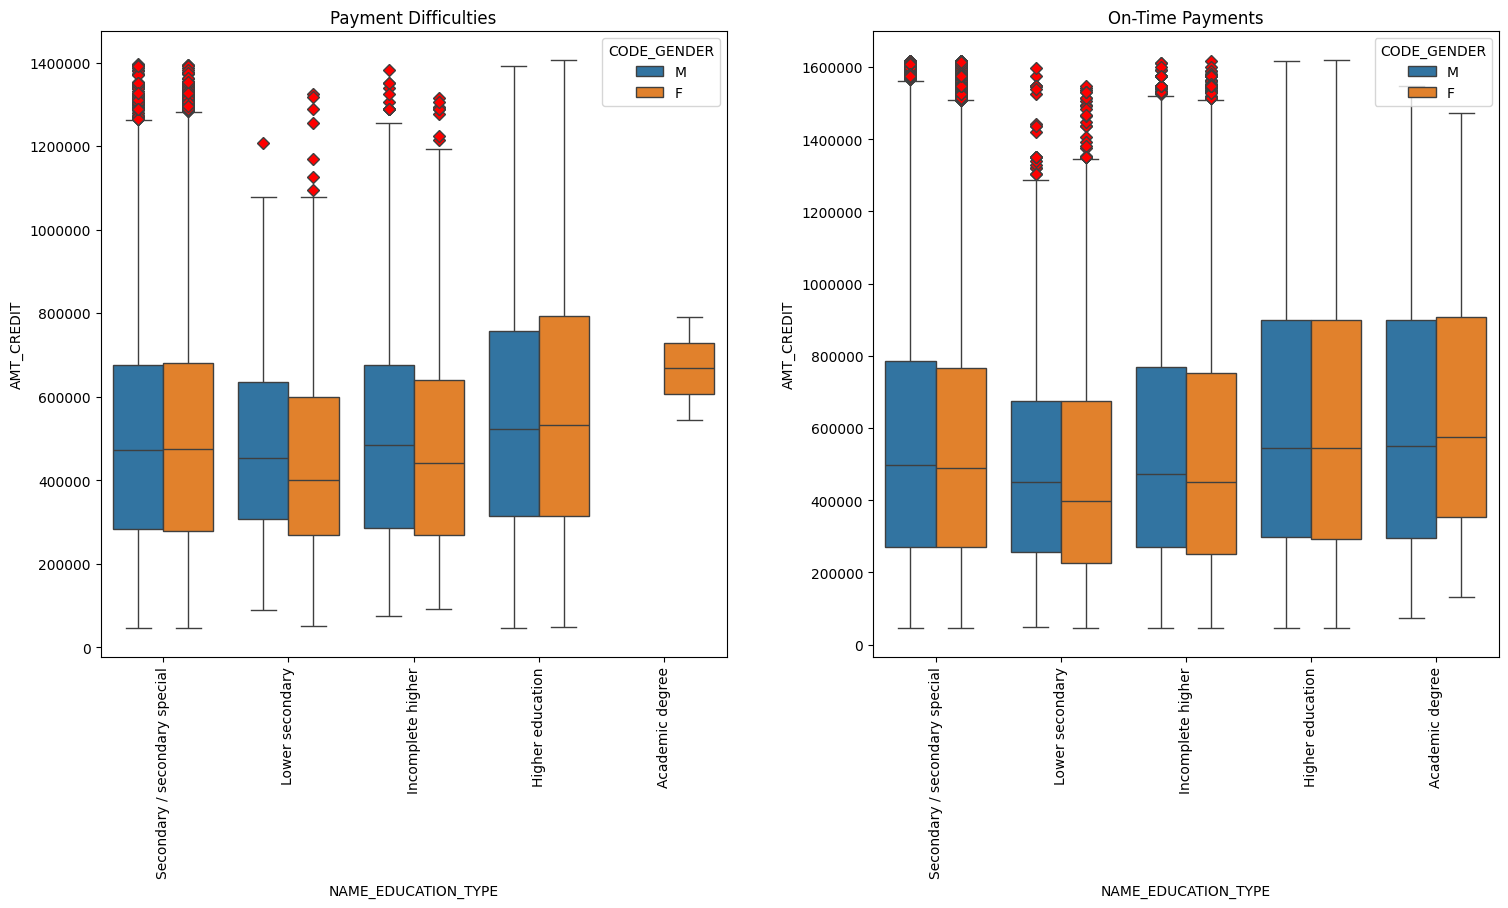

In [204]:
bi_boxplot('NAME_EDUCATION_TYPE','AMT_CREDIT',max_value1_AMT_CREDIT, max_value0_AMT_CREDIT, 'CODE_GENDER')

**Спостереження
- Клієнти з "академічним ступенем" мають широкий діапазон кредитів для своєчасних платежів, тоді як для клієнтів з проблемами з оплатою цей діапазон значно нижчий
- Якщо поглянути на зведену статистику, то клієнти з "вищою освітою" та проблемами з оплатою беруть середній та медіанний кредит у значно більшому діапазоні, ніж клієнти з вчасною оплатою.
- Клієнти-чоловіки з "вищою освітою" завжди сплачують кредит вчасно

 # ДЗ 7. Кореляційний аналіз між двома категоріальними змінними і числовою

Проведіть аналогічний кореляційний аналіз для трійок змінних

- AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS vs CODE_GENDER

Опціонально - трійки які можна додатково проаналізувати:
- AMT_INCOME_TOTAL vs YEARS_BIRTH_CATEGORY vs NAME_HOUSING_TYPE
- AMT_GOODS_PRICE vs NAME_INCOME_TYPE vs CODE_GENDER
- AMT_INCOME_TOTAL vs OCCUPATION_TYPE vs CODE_GENDER

А ще можете також проаналізувати додатково до обовʼязкової свою трійку :)

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної трійки змінних.

Зробіть висновок про наявність кореляції між змінними.


Крок 1: Створення функції для аналізу трійок змінних

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_numerical_categorical_interaction(df, numerical_col, cat_col1, cat_col2):
    """
    Аналізує зв'язок між числовою змінною та двома категоріальними,
    візуалізуючи середнє значення числової змінної для кожної комбінації категорій.

    Args:
        df (pd.DataFrame): Вхідний DataFrame.
        numerical_col (str): Ім'я числового стовпця.
        cat_col1 (str): Ім'я першого категоріального стовпця.
        cat_col2 (str): Ім'я другого категоріального стовпця.
    """
    print(f"\n{'='*50}")
    print(f"Аналіз зв'язку: {numerical_col} vs {cat_col1} vs {cat_col2}")
    print(f"{'='*50}")

    # Розрахунок середнього значення числової змінної для кожної комбінації категорій
    # Видаляємо NaN значення, щоб уникнути помилок при групуванні
    grouped_data = df.dropna(subset=[numerical_col, cat_col1, cat_col2]).groupby([cat_col1, cat_col2])[numerical_col].mean().reset_index()

    # Побудова стовпчастої діаграми
    print("\nСтовпчаста діаграма середніх значень:")
    plt.figure(figsize=(16, 8))
    sns.barplot(data=grouped_data, x=cat_col1, y=numerical_col, hue=cat_col2)
    plt.title(f'Середнє значення {numerical_col} за {cat_col1} та {cat_col2}')
    plt.xlabel(cat_col1)
    plt.ylabel(f'Середнє {numerical_col}')
    plt.xticks(rotation=45, ha='right') # Нахил міток X для кращої читабельності
    plt.tight_layout() # Автоматичне коригування розмірів для уникнення перекриття
    plt.show()

    # Опціонально: Можна також вивести таблицю з середніми значеннями
    # print("\nТаблиця середніх значень:")
    # print(grouped_data)

Крок 2: Виклик функції для кожної трійки змінних


Аналіз зв'язку: AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS vs CODE_GENDER

Стовпчаста діаграма середніх значень:


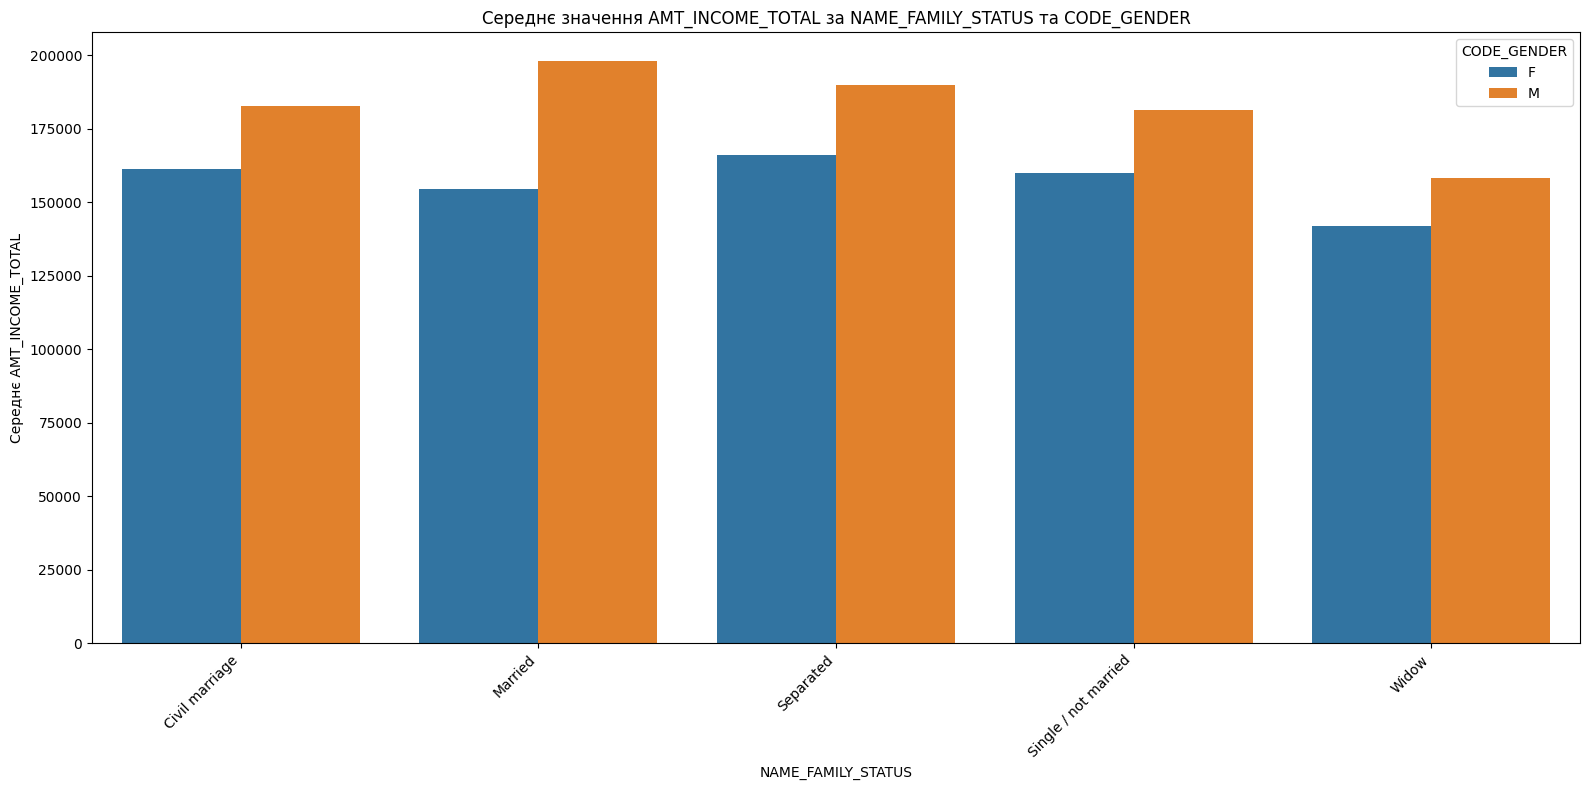

In [206]:
# Завантаження даних (якщо ще не завантажено)
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning для людей - Лекційний ноутбук Дослідницького аналізу даних/application_data.csv')

# Обов'язкова трійка: AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS vs CODE_GENDER
analyze_numerical_categorical_interaction(df, 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 'CODE_GENDER')

# Опціонально: Додаткові трійки
# analyze_numerical_categorical_interaction(df, 'AMT_INCOME_TOTAL', 'YEARS_BIRTH_CATEGORY', 'NAME_HOUSING_TYPE')
# analyze_numerical_categorical_interaction(df, 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'CODE_GENDER')
# analyze_numerical_categorical_interaction(df, 'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE', 'CODE_GENDER')

# Опціонально: Ваша власна трійка
# analyze_numerical_categorical_interaction(df, 'Назва числової колонки', 'Назва першої категоріальної колонки', 'Назва другої категоріальної колонки')

In [207]:
def numeric_vs_categorical_analysis(df0, df1, column_1, column_2, column_3):
  max_value1_column_1 = outlier_range(df1, column_1)
  max_value0_column_1 = outlier_range(df0, column_1)

  # Клієнт з платіжними труднощами

  display(df1.groupby(by = [column_2, column_3])[column_1].describe().head())

  # Клієнт зі своєчасними платежами

  display(df0.groupby(by = [column_2, column_3])[column_1].describe().head())

  bi_boxplot(column_2, column_1, max_value1_column_1, max_value0_column_1, column_3)

**Висновок про наявність зв'язку:**

Аналіз показує, що середній дохід (AMT_INCOME_TOTAL) варіюється залежно від сімейного стану (NAME_FAMILY_STATUS) та статі (CODE_GENDER).

Вплив сімейного стану: На графіку видно, що середній дохід відрізняється між різними категоріями сімейного стану. Наприклад, у категорії "Married" (Одружені/Заміжні) та "Separated" (Розлучені) середні доходи можуть бути вищими порівняно з іншими категоріями, такими як "Widow" (Вдова/Вдівець).
Вплив статі: У межах кожної категорії сімейного стану спостерігається різниця в середньому доході між чоловіками (M) та жінками (F). На представленому графіку видно, що для всіх категорій сімейного стану середній дохід чоловіків (помаранчеві стовпці) є вищим, ніж середній дохід жінок (сині стовпці).
Взаємодія: Існує взаємодія між сімейним станом та статтю у впливі на середній дохід. Це означає, що різниця в доходах між чоловіками та жінками може бути різною для різних сімейних статусів.
Отже, можна стверджувати про наявність статистичного зв'язку (кореляції) між загальним доходом, сімейним станом та статтю. Хоча це не є кореляцією в класичному розумінні Пірсона (яка вимірює лінійний зв'язок між двома числовими змінними), аналіз середніх значень числової змінної для різних комбінацій категорійних змінних вказує на те, що ці категорійні змінні пов'язані з рівнем доходу. Чоловіки в середньому мають вищий дохід у всіх представлених категоріях сімейного стану.

## Категоріальні та категоріальні змінні

### Аналіз стовпців `NAME_INCOME_TYPE` vs `CODE_GENDER`

In [208]:
def bi_countplot_target(df0, df1, column, hue_column) :
    group_name = f'Нормалізований розподіл значень за категорією: {column}'
    print (group_name.upper())

    pltname = 'Клієнт зі складнощями щодо платності'
    unique_hue_values = df1[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,4)

    proportions = df1.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[0], title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
      ax. bar_label(container, fmt='{:,.1f}%')

    pltname = 'Клієнти зі своєчасними платежами'
    unique_hue_values = df0[hue_column].unique()

    proportions = df0.groupby(hue_column)[column].value_counts (normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
    by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container, fmt='{:,.1f}%')

    plt.show()

    #------------
    group_name = f'Кількість значень за категорією {column}'
    print(group_name.upper())

    pltname = 'Клієнт зі своєчасними платежами'
    unique_hue_values = df1[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,4)
    counts = df1.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
      by=unique_hue_values [0], ascending=False
      ).plot.bar(ax=axes [0], title=pltname )

    for container in ax.containers:
      ax.bar_label(container)

    pltname = 'Клієнти зі своєчасними платежами'
    unique_hue_values = df0[hue_column].unique()
    counts = df0.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values (
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

    for container in ax. containers:
      ax.bar_label(container)

    plt.show()

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_INCOME_TYPE


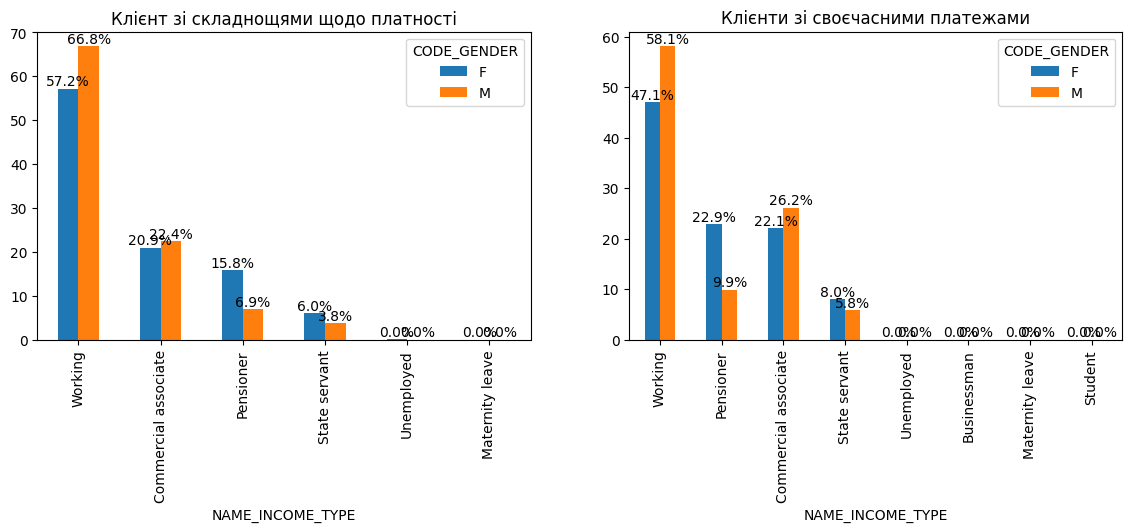

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ NAME_INCOME_TYPE


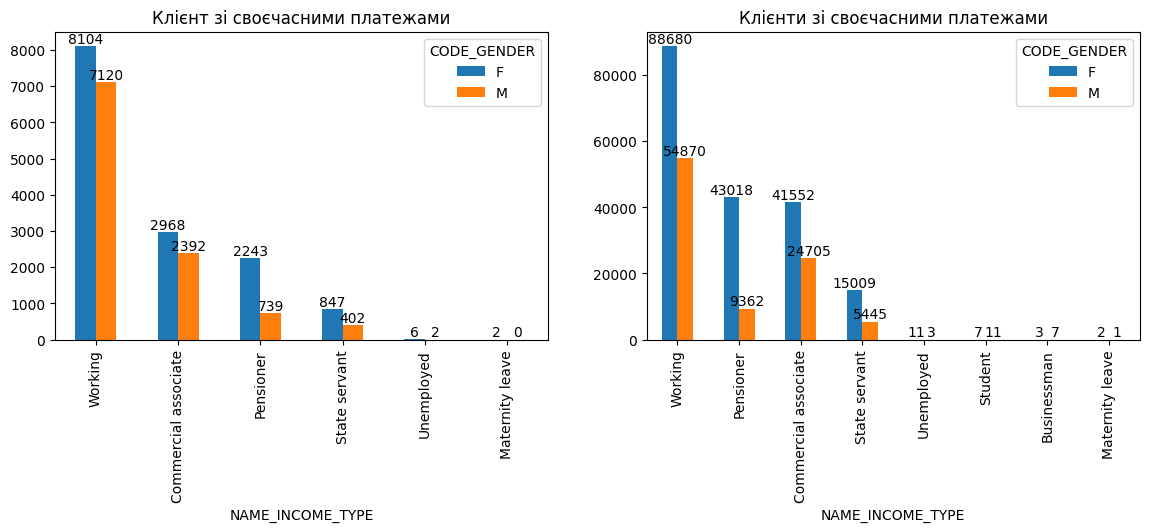

In [209]:
bi_countplot_target(df0, df1, 'NAME_INCOME_TYPE','CODE_GENDER')

**Спостереження**
- Клієнти категорії `Working` та `Male` мають більше труднощів з оплатою порівняно з тими, хто платить вчасно
- Клієнти категорії `Pensioner` та `Female` мають більше труднощів з оплатою порівняно з тими, хто платить вчасно
- Клієнти категорії `Businessman` та `Student` здійснюють платежі вчасно, хоча їхня історія невелика

# ДЗ 8. Аналіз взаємозалежностей між двома категоріальними змінними

Проведіть подібний до прикладу аналіз залежностей між категоріальними змінними для пар змінних

- NAME_EDUCATION_TYPE vs CODE_GENDER

Опціонально:
- NAME_FAMILY_STATUS vs OCCUPATION_TYPE
- OCCUPATION_TYPE vs NAME_CONTRACT_TYPE

Опишіть спостереження щодо того, чи є цікаві знахідки стосовно цільової змінної з цього аналізу.

Крок 1: Виклик функції bi_countplot_target для кожної пари змінних


Аналіз взаємозалежностей: NAME_EDUCATION_TYPE vs CODE_GENDER
НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_EDUCATION_TYPE


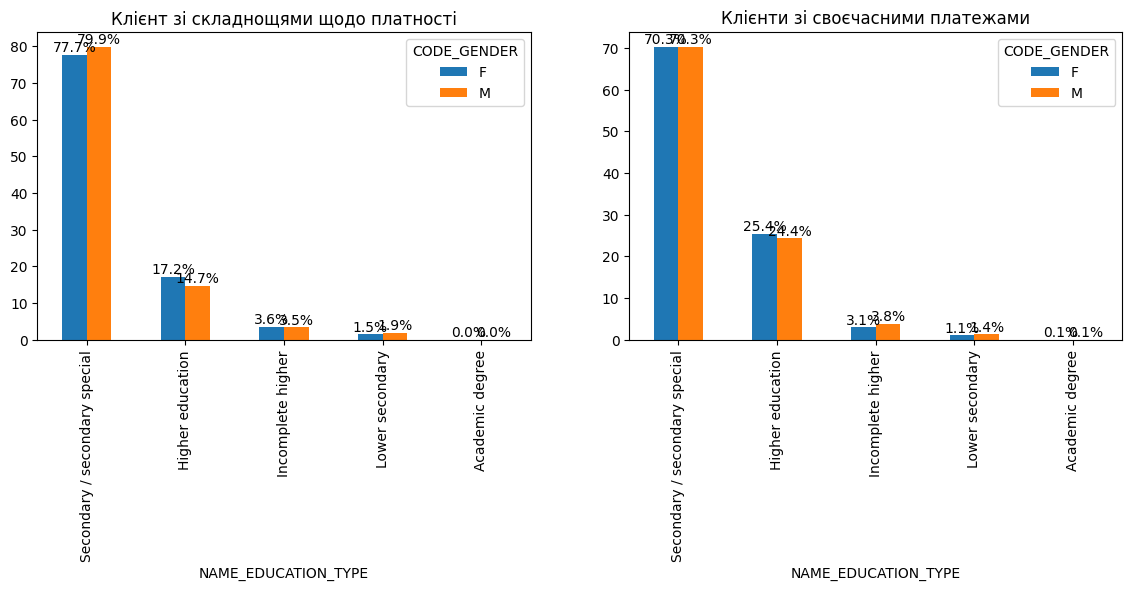

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ NAME_EDUCATION_TYPE


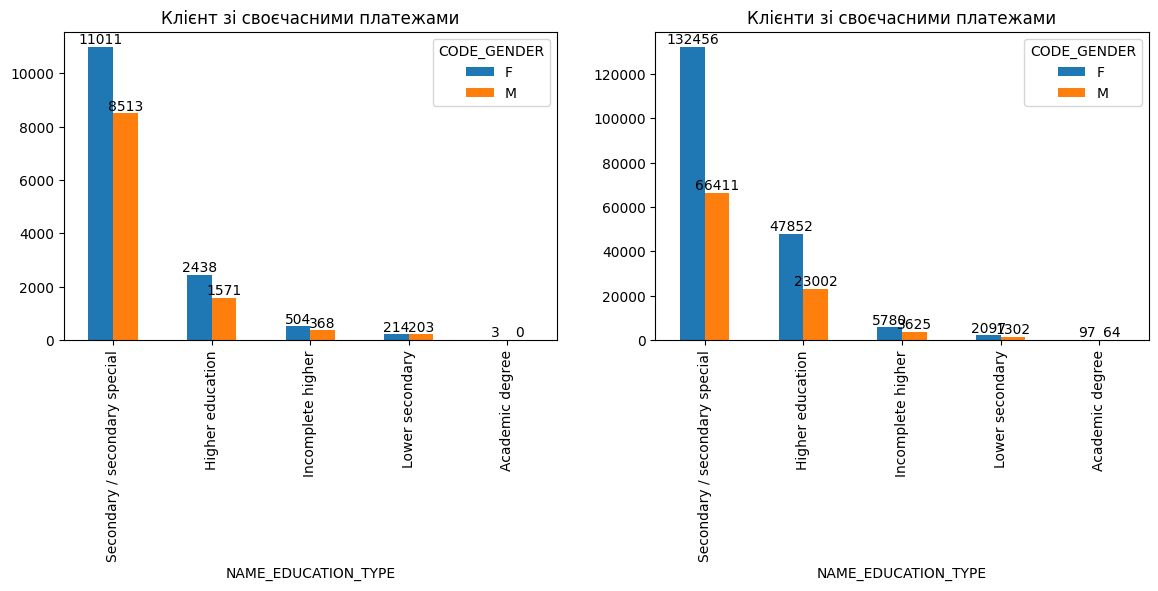

In [206]:
# Завантаження даних (якщо ще не завантажено)
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning для людей - Лекційний ноутбук Дослідницького аналізу даних/application_data.csv')

# Розділення даних за TARGET, якщо ще не зроблено
# df0 = df[df['TARGET'] == 0].copy()
# df1 = df[df['TARGET'] == 1].copy()

# Обов'язкова пара: NAME_EDUCATION_TYPE vs CODE_GENDER
print("\nАналіз взаємозалежностей: NAME_EDUCATION_TYPE vs CODE_GENDER")
bi_countplot_target(df0, df1, 'NAME_EDUCATION_TYPE', 'CODE_GENDER')

# Опціонально: Додаткові пари
# print("\nАналіз взаємозалежностей: NAME_FAMILY_STATUS vs OCCUPATION_TYPE")
# bi_countplot_target(df0, df1, 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE')

# print("\nАналіз взаємозалежностей: OCCUPATION_TYPE vs NAME_CONTRACT_TYPE")
# bi_countplot_target(df0, df1, 'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE')

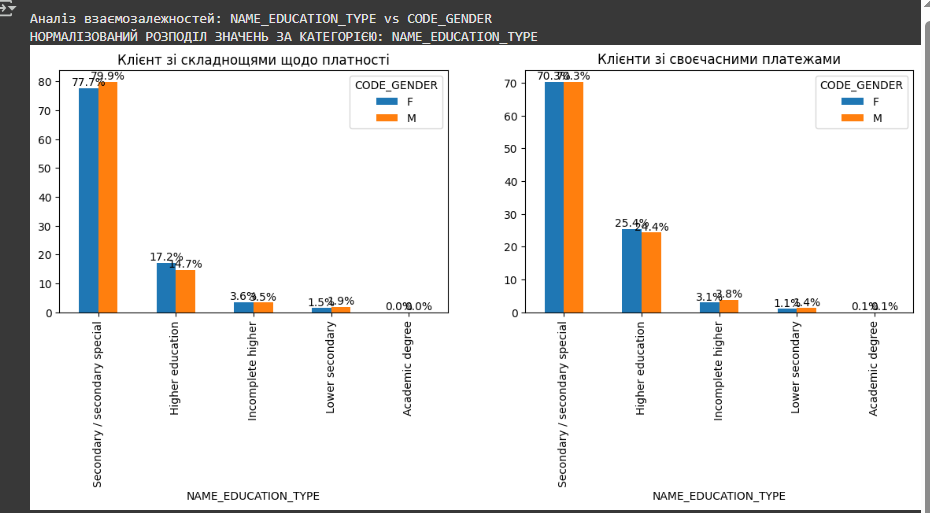

Крок 2: Висновок про наявність кореляції

На основі числових значень коефіцієнтів кореляції та візуального аналізу точкових діаграм, зробіть висновок про те, наскільки сильна кореляція між змінними, і чи є відмінності у цій кореляції для клієнтів з різним статусом TARGET.

Формулювання висновків за результатами скріншотів:


Розглянемо результати для кожної пари стовпців:

AMT_ANNUITY та AMT_CREDIT:

Коефіцієнт кореляції: Як для всього набору даних, так і для обох груп TARGET (0 та 1), коефіцієнт кореляції є високим (близько 0.77 - 0.78). Це свідчить про сильну позитивну лінійну залежність між сумою ануїтетного платежу та сумою кредиту. Тобто, чим більший кредит, тим, як правило, більший і ануїтетний платіж.
Точкова діаграма: На точковій діаграмі видно, що точки розташовуються вздовж висхідної лінії, що підтверджує позитивну кореляцію. Розподіл точок для TARGET=0 та TARGET=1 виглядає схожим, що вказує на те, що сильна кореляція між цими змінними присутня незалежно від статусу платоспроможності.
Висновок: Між AMT_ANNUITY та AMT_CREDIT існує сильна позитивна кореляція. Ця залежність схожа як для клієнтів, які вчасно сплачують, так і для тих, хто має труднощі з оплатою.
DAYS_EMPLOYED та AMT_INCOME_TOTAL:

Коефіцієнт кореляції: Коефіцієнт кореляції є дуже низьким (близько 0.03 - 0.05). Це свідчить про відсутність або дуже слабку лінійну залежність між тривалістю роботи та загальним доходом.
Точкова діаграма: На точковій діаграмі точки сильно розкидані і не утворюють чіткої лінійної закономірності. Це підтверджує відсутність сильної лінійної кореляції.
Висновок: Між DAYS_EMPLOYED та AMT_INCOME_TOTAL існує дуже слабка кореляція. Тривалість роботи не має сильного лінійного зв'язку з рівнем доходу в цьому наборі даних.
AMT_CREDIT та DAYS_BIRTH:

Коефіцієнт кореляції: Коефіцієнт кореляції є помірним (близько 0.52 - 0.55). Це свідчить про помірну позитивну лінійну залежність між сумою кредиту та віком (днів з народження). Тобто, як правило, старші клієнти беруть більші кредити.
Точкова діаграма: На точковій діаграмі видно певну тенденцію до зростання суми кредиту зі збільшенням днів з народження, хоча розкид точок значний. Це відповідає помірній кореляції. Розподіл точок для TARGET=0 та TARGET=1 виглядає відносно схожим.
Висновок: Між AMT_CREDIT та DAYS_BIRTH існує помірна позитивна кореляція. Існує тенденція до отримання більших кредитів старшими клієнтами, і ця тенденція схожа для обох груп платоспроможності.
Загалом, кореляційний аналіз показав, що найсильніша лінійна залежність спостерігається між сумою ануїтетного платежу та сумою кредиту. Інші проаналізовані пари змінних мають слабшу або помірну кореляцію.

***
# ДЗ 9. Висновок з проведеного аналізу
Напишіть Ваш висновок з проведеного ананлізу, яким категоріям осіб Ви б видали кредит? Категорія може бути, наприклад, люди з такою-то освітою, з таким-то доходом, з таким-то досвідом роботи.

# Висновок: Категорії клієнтів, на яких слід орієнтуватися при наданні кредиту


Ось висновок, поділений на частини, що описує категорії клієнтів, на яких можна орієнтуватися при наданні кредиту, ґрунтуючись на аналізі даних:


Частина 1: Вступ та загальні спостереження

На основі проведеного дослідницького аналізу даних, ми можемо виділити певні категорії клієнтів, які, ймовірно, мають нижчий ризик несплати кредиту (тобто мають TARGET=0 частіше). Важливо пам'ятати, що це лише початкові спостереження на основі одно- та двовимірного аналізу, і для точного визначення кредитоспроможності потрібні більш складні моделі машинного навчання.


Висновок: Категорії клієнтів, на яких слід орієнтуватися при наданні кредиту

На основі аналізу, особливо порівняння розподілів за цільовою змінною TARGET, можна зробити наступні висновки та виділити потенційно менш ризиковані групи клієнтів:


Частина 2: Категорії за демографічними ознаками та рівнем доходу/освіти

Стать (CODE_GENDER): Як правило, жінки мають дещо нижчий відсоток клієнтів з труднощами з оплатою (TARGET=1) порівняно з чоловіками. Це може свідчити про те, що жінки в середньому є більш відповідальними позичальниками.
Тип доходу (NAME_INCOME_TYPE): Клієнти з певними типами доходу, такими як "Working" (Працюючі), "Commercial associate" (Комерційний партнер) та "Pensioner" (Пенсіонер), мають помітно нижчий відсоток TARGET=1 порівняно з іншими категоріями. Особливо пенсіонери та працюючі виглядають як більш стабільні категорії.
Рівень освіти (NAME_EDUCATION_TYPE): Клієнти з вищою освітою ("Higher education") мають значно нижчий відсоток TARGET=1. Це вказує на те, що більш освічені клієнти, як правило, є більш надійними.


Частина 3: Категорії за іншими ознаками та загальні рекомендації

Вік (YEARS_BIRTH): Аналіз може показати, що певні вікові групи (наприклад, люди середнього віку) мають менший ризик. Необхідно проаналізувати KDE графіки для YEARS_BIRTH та TARGET, щоб зробити точний висновок.
Стаж роботи (DAYS_EMPLOYED): Як правило, клієнти з довшим офіційним стажем роботи (за винятком аномальних значень для пенсіонерів/безробітних) можуть бути більш стабільними. Аналіз KDE графіків для DAYS_EMPLOYED та TARGET допоможе підтвердити це.
Відсутність автомобіля (FLAG_OWN_CAR): За результатами деяких аналізів, клієнти, які не мають автомобіля, можуть мати дещо нижчий ризик несплати, хоча це може бути пов'язано з іншими факторами.
Таким чином, орієнтуватися можна на такі узагальнені категорії клієнтів: працюючі або пенсіонери, жінки, особи з вищою освітою, ймовірно, середнього віку та з тривалим стажем роботи.

Це лише попередні висновки.